<a href="https://colab.research.google.com/github/jeevanvishwa02/Data_Science/blob/main/Capstone_Project_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import the Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from datetime import date
import datetime as dt
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

## Mount the Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Read the data

In [ ]:
# Loading data file
Insur_data = pd.read_excel('/content/drive/Shareddrives/Capstone/Canada Sales Data for Captsone with payment method updated v2.xlsx')

In [ ]:
pd.set_option('display.max_columns', None) # To check all columns in the dataframe
Insur_data.head(2) #Check sample of 2 rows

,Status,Product,annual_premium,Carrier,billing_frequency,payment_method,benefit_amount,Effective Date,termination_date,Channel,dob,province,city,gender_id,postal_code,Inforce/ Not-Inforce,Terminated policies
0,Inforce (Comm Paid),AD&D,360.0,chubb,Monthly,cc,250000,2022-09-14,NaT,Call Centre,1968-06-18,BC,Surrey,1,V3W 0R8,Inforce,NaN
1,Inforce (Comm Paid),Final Expense,702.0,chubb,Monthly,check,12500,2022-09-14,NaT,Call Centre,1968-07-24,SK,Kamsack,1,S0A 1S0,Inforce,NaN


## Initial Data Exploration

### Data Dictionary

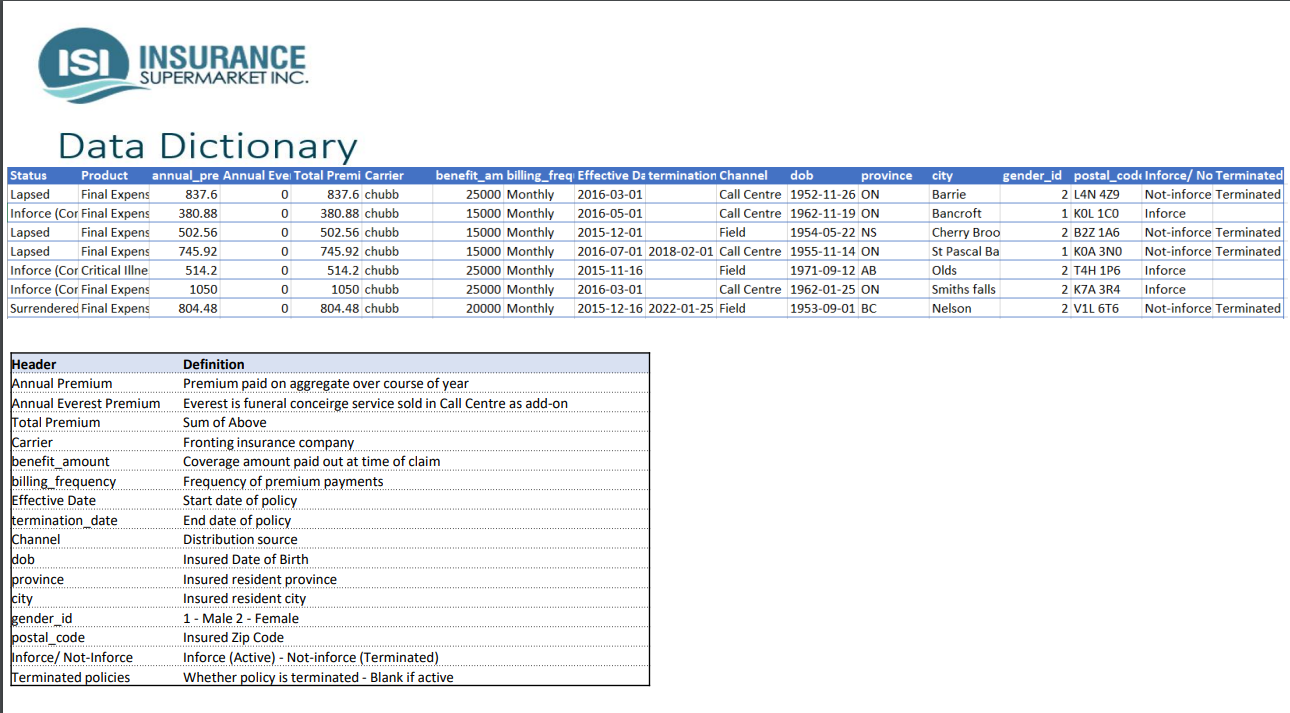

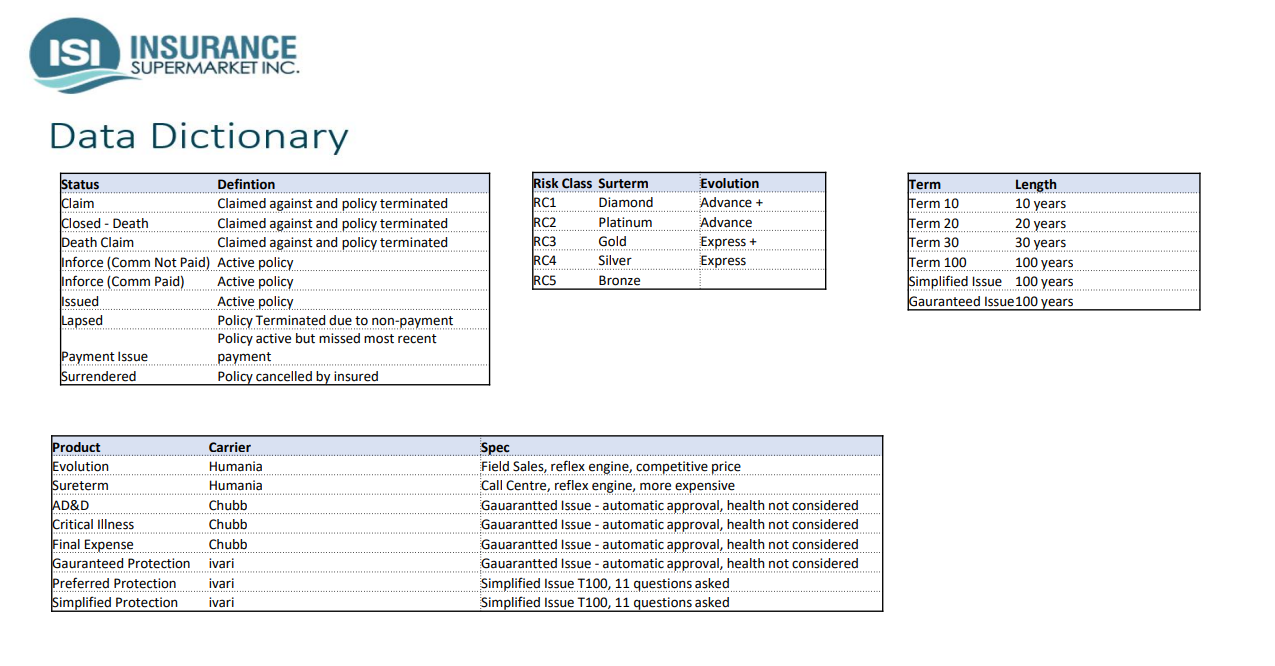

In [ ]:
Insur_data.head(2)

,Status,Product,annual_premium,Carrier,billing_frequency,payment_method,benefit_amount,Effective Date,termination_date,Channel,dob,province,city,gender_id,postal_code,Inforce/ Not-Inforce,Terminated policies
0,Inforce (Comm Paid),AD&D,360.0,chubb,Monthly,cc,250000,2022-09-14,NaT,Call Centre,1968-06-18,BC,Surrey,1,V3W 0R8,Inforce,NaN
1,Inforce (Comm Paid),Final Expense,702.0,chubb,Monthly,check,12500,2022-09-14,NaT,Call Centre,1968-07-24,SK,Kamsack,1,S0A 1S0,Inforce,NaN


In [ ]:
Insur_data.tail(2)

,Status,Product,annual_premium,Carrier,billing_frequency,payment_method,benefit_amount,Effective Date,termination_date,Channel,dob,province,city,gender_id,postal_code,Inforce/ Not-Inforce,Terminated policies
59344,Inforce (Comm Paid),Final Expense,1192.32,chubb,Monthly,check,10000,2015-11-01,NaT,Field,1945-02-28,BC,NaN,2,V0P 1G0,Inforce,NaN
59345,Lapsed,Final Expense,360.00,chubb,Monthly,check,20000,2015-11-01,2016-03-01,Field,1973-01-18,ON,LONDON,2,N6K 3N1,Not-inforce,Terminated


In [ ]:
# Shape of the data 
print("There are",Insur_data.shape[0],"rows and", Insur_data.shape[1],"columns in the dataset")

There are 59346 rows and 17 columns in the dataset


In [ ]:
# More info of the datase
Insur_data.info()
Insur_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59346 entries, 0 to 59345
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Status                59346 non-null  object        
 1   Product               59346 non-null  object        
 2   annual_premium        59346 non-null  float64       
 3   Carrier               59346 non-null  object        
 4   billing_frequency     59346 non-null  object        
 5   payment_method        59323 non-null  object        
 6   benefit_amount        59346 non-null  int64         
 7   Effective Date        59346 non-null  datetime64[ns]
 8   termination_date      17370 non-null  datetime64[ns]
 9   Channel               59327 non-null  object        
 10  dob                   59346 non-null  datetime64[ns]
 11  province              59343 non-null  object        
 12  city                  59342 non-null  object        
 13  gender_id       

,annual_premium,benefit_amount,gender_id
count,59346.000000,5.934600e+04,59346.000000
mean,1230.037451,8.726183e+04,1.551848
std,2833.192340,1.473352e+05,0.497309
min,34.750000,1.000000e+02,1.000000
25%,406.110000,1.000000e+04,1.000000
50%,636.240000,2.500000e+04,2.000000
75%,1019.160000,7.500000e+04,2.000000
max,43762.800000,4.500000e+06,2.000000


## Data Cleaning

In [ ]:
#Calculate number of NULLs in the dataset
Insur_data.isna().sum()

Status                      0
Product                     0
annual_premium              0
Carrier                     0
billing_frequency           0
payment_method             23
benefit_amount              0
Effective Date              0
termination_date        41976
Channel                    19
dob                         0
province                    3
city                        4
gender_id                   0
postal_code                 1
Inforce/ Not-Inforce        0
Terminated policies     41373
dtype: int64

Change Column names

In [ ]:
Insur_data.columns=['Status', 'Product', 'Annual_premium', 'Carrier', 'billing_frequency', 'Payment_method', 'benefit_amount', 'Effective Date', 
       'termination_date', 'Channel', 'dob', 'province', 'city', 'gender_id', 'postal_code',
       'Inforce/ Not-Inforce','Terminated_policies']

Check for Duplicates

In [ ]:
print('There are ',Insur_data.duplicated().sum(),'duplicated values in data')
Insur_data[Insur_data.duplicated()].head(3)

There are  21 duplicated values in data


,Status,Product,Annual_premium,Carrier,billing_frequency,Payment_method,benefit_amount,Effective Date,termination_date,Channel,dob,province,city,gender_id,postal_code,Inforce/ Not-Inforce,Terminated_policies
1162,Inforce (Comm Paid),Evolution T100 Essence,2281.20,evolution,Monthly,check,25000,2022-09-01,NaT,Field,1962-03-26,BC,Surrey,2,V3X 1T9,Inforce,NaN
3576,Surrendered,Critical Illness,975.84,chubb,Monthly,cc,5000,2022-07-28,2022-08-27,DTC,1955-01-10,AB,Beaverlodge,2,T0H 0C0,Not-inforce,Terminated
6616,Inforce (Comm Paid),Critical Illness,579.12,chubb,Monthly,check,8000,2022-06-01,NaT,Field,1963-04-05,QC,Delson,1,J5B0B3,Inforce,NaN


In [ ]:
# Drop duplicates
Insur_data.drop_duplicates(subset=None, keep='first', inplace=True)

In [ ]:
Insur_data.shape

(59325, 17)

"21 duplicates are removed from the dataset"

### Check for Missing values

Payment Method and Channel

In [ ]:
# Filling missing values in payment method and channel
Insur_data['Payment_method'].fillna(method ='pad',inplace = True)
Insur_data['Channel'].fillna(method ='pad',inplace = True)

In [ ]:
print('pct of missing values in each column are as follows: \n')
round(Insur_data.isna().sum()/len(Insur_data),2)

pct of missing values in each column are as follows: 



Status                  0.00
Product                 0.00
Annual_premium          0.00
Carrier                 0.00
billing_frequency       0.00
Payment_method          0.00
benefit_amount          0.00
Effective Date          0.00
termination_date        0.71
Channel                 0.00
dob                     0.00
province                0.00
city                    0.00
gender_id               0.00
postal_code             0.00
Inforce/ Not-Inforce    0.00
Terminated_policies     0.70
dtype: float64

In [ ]:
# Age of customer when taking the policy
Insur_data['Age_EffDate'] = round((Insur_data['Effective Date'] - Insur_data['dob']).dt.days/365,0)
Insur_data[['dob','Effective Date','Age_EffDate']].head()  #Check the sample

,dob,Effective Date,Age_EffDate
0,1968-06-18,2022-09-14,54.0
1,1968-07-24,2022-09-14,54.0
2,1978-08-28,2022-09-14,44.0
3,1965-07-28,2022-09-14,57.0
4,1953-10-05,2022-09-14,69.0


In [ ]:
print("Missing values are present in termination date and Terminated polices - But these columns can have NULLs as polices which are not terminated wont have Termination dates")

Missing values are present in termination date and Terminated polices - But these columns can have NULLs as polices which are not terminated wont have Termination dates


In [ ]:
#Distribution of Termination policies
#Distribution of target class
round(Insur_data.Terminated_policies.value_counts()/len(Insur_data),3)

Terminated    0.303
Name: Terminated_policies, dtype: float64

In [ ]:
#Check for Missing values for the rows which are not terminated
Insur_data[Insur_data['Terminated_policies']=='Terminated'].isnull().sum()
#Check for Missing values for the rows which are not terminated
round(Insur_data[Insur_data['Terminated_policies']=='Terminated'].isnull().sum()/len(Insur_data[Insur_data['Terminated_policies']=='Terminated']),2)

Status                  0.00
Product                 0.00
Annual_premium          0.00
Carrier                 0.00
billing_frequency       0.00
Payment_method          0.00
benefit_amount          0.00
Effective Date          0.00
termination_date        0.04
Channel                 0.00
dob                     0.00
province                0.00
city                    0.00
gender_id               0.00
postal_code             0.00
Inforce/ Not-Inforce    0.00
Terminated_policies     0.00
Age_EffDate             0.00
dtype: float64

1. There are total of 659 missing Termination dates for terminated policies which constitute 4% of terminated policies data (Need to take a call on how to proceed these)
2. There are other columns where data is missing for less than 10 rows. We can safely exclude/ ignore them from analysis as they have minimal effect on our model.

## Data Transformation

### Standardizing terminated policies column

In [ ]:
# Markinging the mis-placed 11 terminated policies as terminated
Insur_data['Terminated_policies'] = np.where(Insur_data['Status'] == 'Terminated', 'Terminated', Insur_data['Terminated_policies'])
# Categorizing terminated policies as 0 -- nulls and 1 -- terminated
Insur_data['Terminated_policies'].fillna(0, inplace = True)
Insur_data['Terminated_policies'] = Insur_data['Terminated_policies'].replace(['Terminated'],[1])
Insur_data['Terminated_policies'].value_counts()

0    41349
1    17976
Name: Terminated_policies, dtype: int64

### Grouping Status

In [ ]:
#Grouping status
s=['Inforce (Comm Paid)', 'Inforce (Comm Not Paid)','Death Claim', 'Closed - Death', 'Claim','Approved', 'Issued']
l=['Inforce','Inforce','Death_Claim','Death_Claim','Death_Claim','New/Issued','New/Issued']
Insur_data['Status'].replace(s,l, inplace = True)
Insur_data['Status'].value_counts()

Inforce          39706
Lapsed            8958
Surrendered       7387
Payment Issue     1623
Death_Claim       1620
New/Issued          20
Terminated          11
Name: Status, dtype: int64

In [ ]:
Insur_data.drop(Insur_data[(Insur_data['Status'] == 'Inforce') & (Insur_data['termination_date'].notnull())].index, inplace=True)

### Converting/Grouping Product

In [ ]:
#Grouping Products
#GEtting only the Terminated policies records by Product column
Pro_list = Insur_data[Insur_data['Terminated_policies']==1].reset_index()
Pro_list = Pro_list['Product'].value_counts()
# Getting the percentage of the termination with respect to products column
Pro_Percent = round(Pro_list*100/Pro_list.sum(),2)
Pro_Percent = Pro_Percent.to_frame() #Converting the series to data frame
# Pro_Percent = pd.DataFrame({'Product':Pro_Percent.index, 'Percent':Pro_Percent.values})
Product_List = [] # getting the list of 96% of terminated Products 
limit = 96
sum = 0
for i in range(len(Pro_Percent)):
  sum += Pro_Percent.Product[i]
  if sum <= limit:
    Product_List.append(Pro_Percent.index[i]) 
  else:
    break
#Adding a new column grouped products
Insur_data['Grpd_Prds'] = np.where(Insur_data['Product'].isin(Product_List), Insur_data['Product'], 'Others')

In [ ]:
Insur_data.head()

,Status,Product,Annual_premium,Carrier,billing_frequency,Payment_method,benefit_amount,Effective Date,termination_date,Channel,dob,province,city,gender_id,postal_code,Inforce/ Not-Inforce,Terminated_policies,Age_EffDate,Grpd_Prds
0,Inforce,AD&D,360.00,chubb,Monthly,cc,250000,2022-09-14,NaT,Call Centre,1968-06-18,BC,Surrey,1,V3W 0R8,Inforce,0,54.0,AD&D
1,Inforce,Final Expense,702.00,chubb,Monthly,check,12500,2022-09-14,NaT,Call Centre,1968-07-24,SK,Kamsack,1,S0A 1S0,Inforce,0,54.0,Final Expense
2,Inforce,SureTerm100 Gold (RC3),476.64,reflexive,Monthly,check,20000,2022-09-14,NaT,Call Centre,1978-08-28,ON,Innisfil,2,L9S 2E7,Inforce,0,44.0,Others
3,Inforce,Final Expense,2018.40,chubb,Monthly,cc,25000,2022-09-14,NaT,Call Centre,1965-07-28,AB,Caslan,1,T0A 0R0,Inforce,0,57.0,Final Expense
4,Inforce,Evolution T100 Advance+,23127.60,evolution,Monthly,cc,500000,2022-09-14,NaT,Field,1953-10-05,AB,Red Deer,2,T4R2G6,Inforce,0,69.0,Evolution T100 Advance+


In [ ]:
#sysdate = date.today()
#sysdate

In [ ]:
#Insur_data['termination_date'] = Insur_data['termination_date'].fillna(sysdate)
#Insur_data

### Policy Duration

Creating Policy duration & Normalizing termination date vs effective date by normalizing policy duraion with median

In [ ]:
# Policy Period
Insur_data['Policy_duration'] = (pd.to_datetime(Insur_data['termination_date']) - pd.to_datetime(Insur_data['Effective Date'])).dt.days/30
Insur_data['Policy_duration'].isna().sum()

#diff = (pd.to_datetime(Insur_data['termination_date']) - pd.to_datetime(Insur_data['Effective Date'])).dt.days


41963

In [ ]:
Insur_data[Insur_data['termination_date'].isna()==False][['termination_date','Effective Date','Policy_duration']].head()

,termination_date,Effective Date,Policy_duration
1022,2022-09-08,2022-09-01,0.233333
2497,2022-10-04,2022-08-12,1.766667
2514,2022-08-31,2022-08-11,0.666667
2640,2022-09-09,2022-08-09,1.033333
2672,2022-08-18,2022-08-08,0.333333


In [ ]:
# Excluding inforce policies and filtering terminated policies
Insur_data[Insur_data['Terminated_policies']==1].isnull().sum()

Status                    0
Product                   0
Annual_premium            0
Carrier                   0
billing_frequency         0
Payment_method            0
benefit_amount            0
Effective Date            0
termination_date        683
Channel                   0
dob                       0
province                  2
city                      2
gender_id                 0
postal_code               0
Inforce/ Not-Inforce      0
Terminated_policies       0
Age_EffDate               0
Grpd_Prds                 0
Policy_duration         683
dtype: int64

In [ ]:
# Groupby to calculate median for each product group
Status_groups = Insur_data.groupby('Grpd_Prds')
# Status_groups.first()   [necessary to show groups]
#Creating a dataframe of group Policies and their medians 
Policy_duration_median = Insur_data[Insur_data['Policy_duration'] > 0].groupby(['Grpd_Prds'])['Policy_duration'].median().reset_index()
#For each group of product from Grpd_Prds which are terminated and Policy_duration is negative, imputing the values of the Policy_duration_median
for i in range(len(Policy_duration_median)):
  Insur_data['Policy_duration'] = np.where((Insur_data['Terminated_policies'] == 1) & 
                                           (Insur_data['Policy_duration'] <= 0) & 
                                           (Insur_data['Grpd_Prds'] == Policy_duration_median.iloc[i,0]),
                                           Policy_duration_median.iloc[i,1],Insur_data['Policy_duration'])
  #InForce Records with Termination date earlier than Effective Date
  Insur_data[Insur_data['Policy_duration']<0] 


In [ ]:
Insur_data[Insur_data['termination_date'].isna()==False][['termination_date','Effective Date','Policy_duration']].head()

,termination_date,Effective Date,Policy_duration
1022,2022-09-08,2022-09-01,0.233333
2497,2022-10-04,2022-08-12,1.766667
2514,2022-08-31,2022-08-11,0.666667
2640,2022-09-09,2022-08-09,1.033333
2672,2022-08-18,2022-08-08,0.333333


In [ ]:
Insur_data[Insur_data['Policy_duration']<0][['termination_date','Effective Date','Policy_duration','Terminated_policies']].head()

,termination_date,Effective Date,Policy_duration,Terminated_policies


Policy Duration is in months and not in years

### Effective Date & Termination Date to be removed as they are captured in policy duration

In [ ]:
Insur_data.drop(['Effective Date','termination_date'], axis=1, inplace=True)
# Insur_data.isna().sum()
Insur_data.head()

,Status,Product,Annual_premium,Carrier,billing_frequency,Payment_method,benefit_amount,Channel,dob,province,city,gender_id,postal_code,Inforce/ Not-Inforce,Terminated_policies,Age_EffDate,Grpd_Prds,Policy_duration
0,Inforce,AD&D,360.00,chubb,Monthly,cc,250000,Call Centre,1968-06-18,BC,Surrey,1,V3W 0R8,Inforce,0,54.0,AD&D,NaN
1,Inforce,Final Expense,702.00,chubb,Monthly,check,12500,Call Centre,1968-07-24,SK,Kamsack,1,S0A 1S0,Inforce,0,54.0,Final Expense,NaN
2,Inforce,SureTerm100 Gold (RC3),476.64,reflexive,Monthly,check,20000,Call Centre,1978-08-28,ON,Innisfil,2,L9S 2E7,Inforce,0,44.0,Others,NaN
3,Inforce,Final Expense,2018.40,chubb,Monthly,cc,25000,Call Centre,1965-07-28,AB,Caslan,1,T0A 0R0,Inforce,0,57.0,Final Expense,NaN
4,Inforce,Evolution T100 Advance+,23127.60,evolution,Monthly,cc,500000,Field,1953-10-05,AB,Red Deer,2,T4R2G6,Inforce,0,69.0,Evolution T100 Advance+,NaN


In [ ]:
from google.colab import files

Insur_data.to_csv('output.csv', encoding = 'utf-8-sig') 
files.download('output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Outliers

In [ ]:
Insur_data.describe().columns

Index(['Annual_premium', 'benefit_amount', 'gender_id', 'Terminated_policies',
       'Age_EffDate', 'Policy_duration'],
      dtype='object')

In [ ]:
#list of continuous columns
Insur_data_cont=Insur_data[Insur_data.describe().columns]
Insur_data_cont=Insur_data_cont.drop('gender_id',axis=1)

In [ ]:
Insur_data_cont.head()

,Annual_premium,benefit_amount,Terminated_policies,Age_EffDate,Policy_duration
0,360.00,250000,0,54.0,NaN
1,702.00,12500,0,54.0,NaN
2,476.64,20000,0,44.0,NaN
3,2018.40,25000,0,57.0,NaN
4,23127.60,500000,0,69.0,NaN


In [ ]:
colours = ['forestgreen','dodgerblue','goldenrod', 'coral' , 'silver' , 'gold' ,'blue'] 
# create fontdicts for formatting figure text
axtitle_dict = {'family': 'serif','color': 'darkred','weight': 'bold','size': 16}
axlab_dict = {'family': 'serif', 'color': 'black','size': 14}

ValueError: ignored

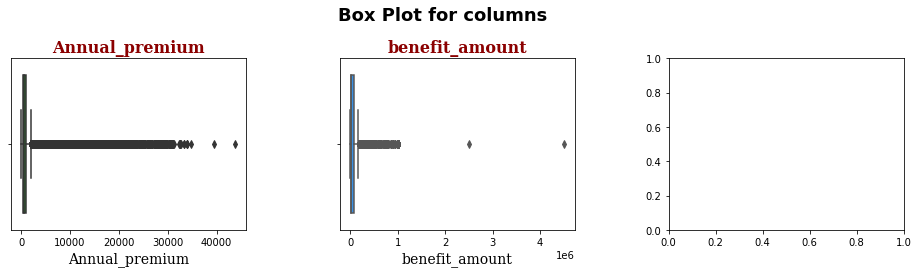

In [ ]:
fig=plt.figure(figsize=[16,12])
fig.suptitle('Box Plot for columns',fontsize=18,fontweight='bold')
fig.subplots_adjust(top=0.92)
fig.subplots_adjust(hspace=0.5,wspace=0.4)
col_list=['Annual_premium', 'benefit_amount','Age', 'Policy_duration']
for i,col in enumerate(col_list):
    ax1=fig.add_subplot(3,3,i+1)
    ax1=sns.boxplot(data=Insur_data_cont,x=col,color=colours[i])
    ax1.set_title(f'{col}', fontdict=axtitle_dict)
    ax1.set_xlabel(f'{col}', fontdict=axlab_dict)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

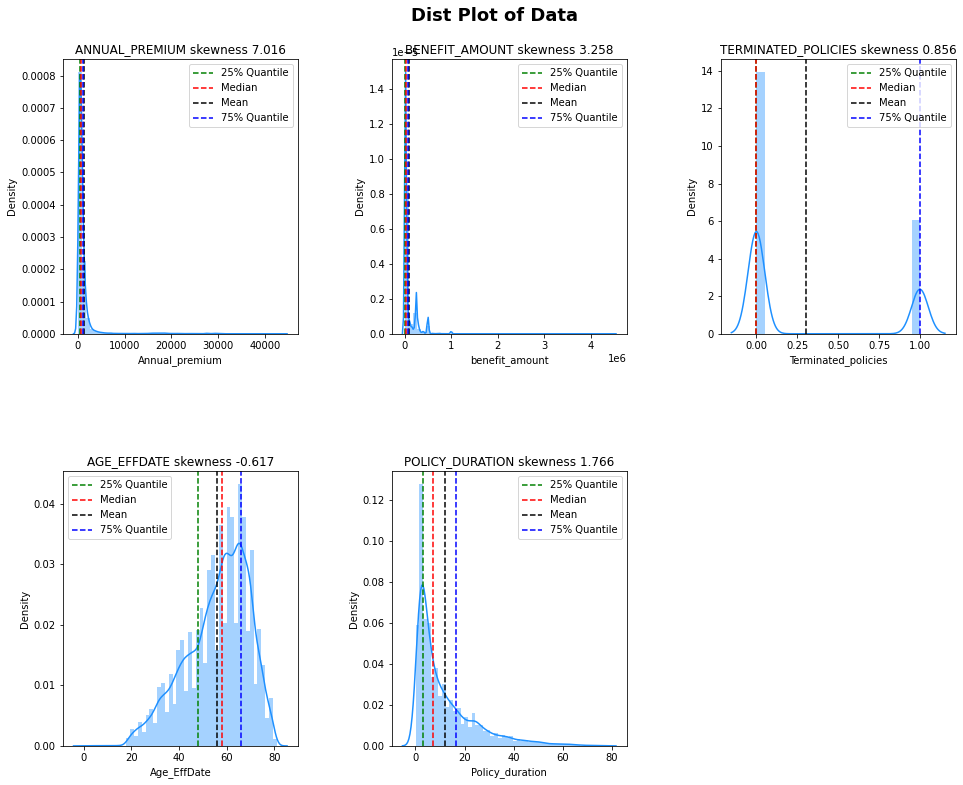

In [ ]:
#Distribution plot
fig=plt.figure(figsize=[16,12])  # Define the size of the figure
fig.suptitle('Dist Plot of Data',fontsize=18,fontweight='bold')  #Super title for entire graph
fig.subplots_adjust(top=0.92)  #Remove some space at the top
fig.subplots_adjust(hspace=0.5,wspace=0.4)  #Remove some space at sides
for i,col in enumerate(Insur_data_cont.columns):
  ax=fig.add_subplot(2,3,i+1)  #Locate the graph in the entire plot
  ax=sns.distplot(Insur_data_cont[col],color='dodgerblue') #Distribution of the column
  ax.axvline(Insur_data_cont[col].quantile(q=0.25),color='green',linestyle='--',label='25% Quantile') #Add a vertical line in the graph
  ax.axvline(Insur_data_cont[col].quantile(q=0.5),color='red',linestyle='--',label='Median')
  ax.axvline(Insur_data_cont[col].mean(),color='black',linestyle='--',label='Mean')
  ax.axvline(Insur_data_cont[col].quantile(q=0.75),color='blue',linestyle='--',label='75% Quantile')
  ax.set_label(f'{col}') #Label is for bottom of each graph
  ax.set_title(f'{col.upper()} skewness {round(Insur_data_cont[col].skew(),3)}')  # Add title at the top and skew ness - it tells how much symmetrical graph is there
  ax.legend(fontsize=10)


In [ ]:
Insur_data_cont.describe()

,Annual_premium,benefit_amount,Terminated_policies,Age_EffDate,Policy_duration
count,59282.000000,5.928200e+04,59282.000000,59282.000000,17319.000000
mean,1230.103669,8.728208e+04,0.303229,56.117337,11.905227
std,2834.093489,1.473658e+05,0.459657,13.047216,12.530455
min,34.750000,1.000000e+02,0.000000,0.000000,0.033333
25%,406.470000,1.000000e+04,0.000000,48.000000,3.000000
50%,636.420000,2.500000e+04,0.000000,58.000000,7.100000
75%,1019.160000,7.500000e+04,1.000000,66.000000,16.566667
max,43762.800000,4.500000e+06,1.000000,81.000000,76.333333


In [ ]:
#Check for count of outliers based on standard definition of lower quartile and upper quartile
#Insur_data_cont
Q1 = Insur_data_cont.quantile(0.25)
Q3 = Insur_data_cont.quantile(0.75)
IQR = Q3 - Q1
#print(IQR)
((Insur_data_cont < (Q1 - 1.5 * IQR)) | (Insur_data_cont > (Q3 + 1.5 * IQR))).any()

Annual_premium          True
benefit_amount          True
Terminated_policies    False
Age_EffDate             True
Policy_duration         True
dtype: bool

In [ ]:
#Upper and Lower limits using standard definition. This will be used to replace the outlier values if necessary (Based on team's discussion)
dict={}
for col in Insur_data_cont.columns:
  percentile75=Insur_data_cont[col].quantile(0.75)
  percentile25=Insur_data_cont[col].quantile(0.25)
  IQR=percentile75-percentile25
  upper_limit=percentile75+1.5*IQR
  lower_limit=percentile25-1.5*IQR
  dict['upper_limit'+'_'+col]=upper_limit
  dict['lower_limit'+'_'+col]=lower_limit

In [ ]:
dict

{'upper_limit_Annual_premium': 1938.1949999999997,
 'lower_limit_Annual_premium': -512.5649999999998,
 'upper_limit_benefit_amount': 172500.0,
 'lower_limit_benefit_amount': -87500.0,
 'upper_limit_Terminated_policies': 2.5,
 'lower_limit_Terminated_policies': -1.5,
 'upper_limit_Age_EffDate': 93.0,
 'lower_limit_Age_EffDate': 21.0,
 'upper_limit_Policy_duration': 36.91666666666667,
 'lower_limit_Policy_duration': -17.35}

In [ ]:
#Check sample of outliers
Insur_data[Insur_data.Age<2].head(5)

AttributeError: ignored

Question - Are policies with age <5 legitimate data?





In [ ]:
#Check sample of outliers for benefit amount
Insur_data[Insur_data.benefit_amount>2000000].head(2)

,Status,Product,Annual_premium,Carrier,billing_frequency,Payment_method,benefit_amount,Channel,dob,province,city,gender_id,postal_code,Inforce/ Not-Inforce,Terminated_policies,Age_EffDate,Grpd_Prds,Policy_duration
15148,Inforce,AD&D,360.0,chubb,Monthly,check,2500000,Call Centre,1957-10-13,ON,North York,1,M3J 0H6,Inforce,0,64.0,AD&D,NaN
18282,Inforce,AD&D,600.0,chubb,Monthly,check,4500000,Call Centre,1966-02-15,BC,Delta,1,V4K 4X1,Inforce,0,56.0,AD&D,NaN


Based on communication from Sponsor, these are legitimate outlier and need not be removed from the data

In [ ]:
#list of Categorical columns
Insur_data_cont
Insur_data_cat = list(set(Insur_data) - set(Insur_data_cont))
Insur_data_cat

['Status',
 'dob',
 'city',
 'Carrier',
 'province',
 'Grpd_Prds',
 'Payment_method',
 'Product',
 'Channel',
 'postal_code',
 'gender_id',
 'Inforce/ Not-Inforce',
 'billing_frequency']

### Correlation

In [ ]:
correlation = Insur_data.corr()
correlation

,Annual_premium,benefit_amount,gender_id,Terminated_policies,Age_EffDate,Policy_duration
Annual_premium,1.000000,0.298538,-0.054991,-0.063558,0.102316,-0.020480
benefit_amount,0.298538,1.000000,-0.147481,-0.059221,-0.308730,-0.074353
gender_id,-0.054991,-0.147481,1.000000,-0.014710,0.037409,-0.003232
Terminated_policies,-0.063558,-0.059221,-0.014710,1.000000,-0.036561,0.010938
Age_EffDate,0.102316,-0.308730,0.037409,-0.036561,1.000000,0.056133
Policy_duration,-0.020480,-0.074353,-0.003232,0.010938,0.056133,1.000000


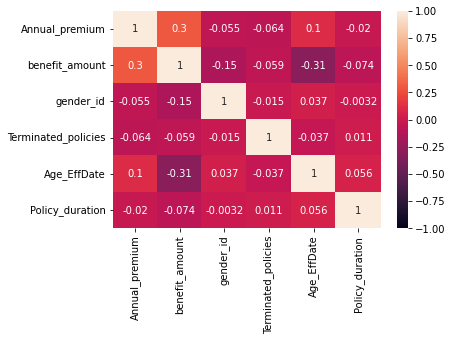

In [ ]:
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True)
sns.set(rc = {'figure.figsize':(5,5)})
plt.show()

# Data Preparation for Model



In [ ]:
Insur_data1 = Insur_data.copy()

In [ ]:
date_of_birth = Insur_data1[['dob']].apply(lambda x: x[0].timestamp(), axis=1).astype(int)
Insur_data1.insert (8, "Date of Birth", date_of_birth)
Insur_data1.drop(['Status', 'city','postal_code', 'Inforce/ Not-Inforce', 'Policy_duration', 'dob','Date of Birth'], axis=1, inplace = True)

In [ ]:
Insur_data1.head(2)

,Product,Annual_premium,Carrier,billing_frequency,Payment_method,benefit_amount,Channel,province,gender_id,Terminated_policies,Age_EffDate,Grpd_Prds
0,AD&D,360.0,chubb,Monthly,cc,250000,Call Centre,BC,1,0,54.0,AD&D
1,Final Expense,702.0,chubb,Monthly,check,12500,Call Centre,SK,1,0,54.0,Final Expense


In [ ]:
#Insur_data1.to_csv('/content/drive/MyDrive/Capestone/modeling.csv')

In [ ]:
Insur_data1['gender_id'] = Insur_data1['gender_id'].replace({1: 'Male', 2: 'Female'})

In [ ]:
Insur_data1.head(2)

,Product,Annual_premium,Carrier,billing_frequency,Payment_method,benefit_amount,Channel,province,gender_id,Terminated_policies,Age_EffDate,Grpd_Prds
0,AD&D,360.0,chubb,Monthly,cc,250000,Call Centre,BC,Male,0,54.0,AD&D
1,Final Expense,702.0,chubb,Monthly,check,12500,Call Centre,SK,Male,0,54.0,Final Expense


### One Hot Encoding

https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/#:~:text=A%20one%20hot%20encoding%20is,is%20marked%20with%20a%201.

In [ ]:
encoded_columns = pd.get_dummies(Insur_data1[['Product', 'Carrier', 'province', 'Grpd_Prds', 'gender_id','Payment_method','billing_frequency','Channel']])
Insur_data1 = Insur_data1.join(encoded_columns).drop([ 'Product', 'Carrier', 'province', 'Grpd_Prds','gender_id','Payment_method','billing_frequency','Channel'], axis=1)

In [ ]:
Insur_data1.shape

(59282, 92)

In [ ]:
Insur_data1.columns

Index(['Annual_premium', 'benefit_amount', 'Terminated_policies',
       'Age_EffDate', 'Product_AD&D', 'Product_Critical Illness',
       'Product_Evolution Jr. Critical Illness Guaranteed Issue',
       'Product_Evolution Jr. Critical Illness Standard',
       'Product_Evolution Jr. Life Guaranteed Issue',
       'Product_Evolution Jr. Life Standard', 'Product_Evolution T10 Advance',
       'Product_Evolution T10 Advance+', 'Product_Evolution T10 Express',
       'Product_Evolution T10 Express+', 'Product_Evolution T100 Advance',
       'Product_Evolution T100 Advance+', 'Product_Evolution T100 Essence',
       'Product_Evolution T100 Express', 'Product_Evolution T100 Express+',
       'Product_Evolution T20 Advance', 'Product_Evolution T20 Advance+',
       'Product_Evolution T20 Express', 'Product_Evolution T20 Express+',
       'Product_Evolution T30 Advance', 'Product_Evolution T30 Advance+',
       'Product_Evolution T30 Express', 'Product_Evolution T30 Express+',
       'Produc

In [ ]:
X = Insur_data1.drop('Terminated_policies', axis = 1)

In [ ]:
X.head(2)

,Annual_premium,benefit_amount,Age_EffDate,Product_AD&D,Product_Critical Illness,Product_Evolution Jr. Critical Illness Guaranteed Issue,Product_Evolution Jr. Critical Illness Standard,Product_Evolution Jr. Life Guaranteed Issue,Product_Evolution Jr. Life Standard,Product_Evolution T10 Advance,Product_Evolution T10 Advance+,Product_Evolution T10 Express,Product_Evolution T10 Express+,Product_Evolution T100 Advance,Product_Evolution T100 Advance+,Product_Evolution T100 Essence,Product_Evolution T100 Express,Product_Evolution T100 Express+,Product_Evolution T20 Advance,Product_Evolution T20 Advance+,Product_Evolution T20 Express,Product_Evolution T20 Express+,Product_Evolution T30 Advance,Product_Evolution T30 Advance+,Product_Evolution T30 Express,Product_Evolution T30 Express+,Product_Final Expense,Product_Guaranteed Protection,Product_Preferred Protection,Product_Preferred Protection Term 10,Product_Standard Protection,Product_Standard Protection Term 10,Product_SureTerm10 Diamond (RC1),Product_SureTerm10 Gold (RC3),Product_SureTerm10 Platinum (RC2),Product_SureTerm10 Silver (RC4),Product_SureTerm100 Bronze (RC5),Product_SureTerm100 Diamond (RC1),Product_SureTerm100 Gold (RC3),Product_SureTerm100 Platinum (RC2),Product_SureTerm100 Silver (RC4),Product_SureTerm20 Diamond (RC1),Product_SureTerm20 Gold (RC3),Product_SureTerm20 Platinum (RC2),Product_SureTerm20 Silver (RC4),Product_SureTerm30 Diamond (RC1),Product_SureTerm30 Gold (RC3),Product_SureTerm30 Platinum (RC2),Product_SureTerm30 Silver (RC4),Carrier_chubb,Carrier_evolution,Carrier_humania,Carrier_ivari,Carrier_juvenile,Carrier_reflexive,province_AB,province_Alberta,province_BC,province_MB,province_NB,province_NL,province_NS,province_NT,province_NU,province_ON,province_Ontario,province_PE,province_QC,province_SK,province_YT,Grpd_Prds_AD&D,Grpd_Prds_Critical Illness,Grpd_Prds_Evolution T10 Advance+,Grpd_Prds_Evolution T100 Advance+,Grpd_Prds_Evolution T20 Advance+,Grpd_Prds_Final Expense,Grpd_Prds_Guaranteed Protection,Grpd_Prds_Others,Grpd_Prds_Preferred Protection,Grpd_Prds_Standard Protection,Grpd_Prds_SureTerm10 Diamond (RC1),Grpd_Prds_SureTerm100 Diamond (RC1),gender_id_Female,gender_id_Male,Payment_method_cc,Payment_method_check,billing_frequency_Annual,billing_frequency_Monthly,Channel_Call Centre,Channel_DTC,Channel_Field
0,360.0,250000,54.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0
1,702.0,12500,54.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0


In [ ]:
y = Insur_data1['Terminated_policies']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Terminated_policies, dtype: int64

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=0)

### Variable Importance

In [ ]:
# plot feature importance manually
from numpy import loadtxt
from xgboost import XGBClassifier
from matplotlib import pyplot

XG Boost

In [ ]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
# feature importance
print(model.feature_importances_)

[0.02669853 0.01458655 0.02002772 0.03106692 0.0226807  0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.00537442 0.01869608 0.         0.
 0.         0.00736824 0.         0.         0.         0.
 0.         0.         0.06203551 0.04759012 0.00692461 0.
 0.01429918 0.         0.         0.         0.         0.
 0.         0.06005181 0.         0.         0.         0.
 0.         0.         0.         0.00566877 0.         0.
 0.         0.01370929 0.1032035  0.         0.03877563 0.
 0.09802465 0.         0.         0.         0.0071303  0.00800592
 0.01373782 0.00688065 0.         0.         0.02292598 0.
 0.         0.02397413 0.00980018 0.         0.         0.
 0.         0.         0.         0.         0.         0.01287009
 0.         0.         0.         0.         0.01087019 0.
 0.01786782 0.         0.         0.         0.02007034 0.21963944
 0.02944493]


In [ ]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)

cols=np.array(X.columns)[sorted_idx]
df_features=pd.DataFrame()

df_features['sorted_idx']=sorted_idx
df_features['cols']=cols
df_features['score']=feature_importance[sorted_idx]

In [ ]:
df_features.sort_values(by=['score'],ascending=False).to_csv('variable_importance.csv')

## Standardizing data

In [ ]:
X_train.columns

Index(['Annual_premium', 'benefit_amount', 'Age_EffDate', 'Product_AD&D',
       'Product_Critical Illness',
       'Product_Evolution Jr. Critical Illness Guaranteed Issue',
       'Product_Evolution Jr. Critical Illness Standard',
       'Product_Evolution Jr. Life Guaranteed Issue',
       'Product_Evolution Jr. Life Standard', 'Product_Evolution T10 Advance',
       'Product_Evolution T10 Advance+', 'Product_Evolution T10 Express',
       'Product_Evolution T10 Express+', 'Product_Evolution T100 Advance',
       'Product_Evolution T100 Advance+', 'Product_Evolution T100 Essence',
       'Product_Evolution T100 Express', 'Product_Evolution T100 Express+',
       'Product_Evolution T20 Advance', 'Product_Evolution T20 Advance+',
       'Product_Evolution T20 Express', 'Product_Evolution T20 Express+',
       'Product_Evolution T30 Advance', 'Product_Evolution T30 Advance+',
       'Product_Evolution T30 Express', 'Product_Evolution T30 Express+',
       'Product_Final Expense', 'Prod

In [ ]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
# fit model no training data
model_std = XGBClassifier()
model_std.fit(X_train_std, y_train)
# feature importance
print(model_std.feature_importances_)

[0.02669853 0.01458655 0.02002772 0.03106692 0.0226807  0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.00537442 0.01869608 0.         0.
 0.         0.00736824 0.         0.         0.         0.
 0.         0.         0.06203551 0.04759012 0.00692461 0.
 0.01429918 0.         0.         0.         0.         0.
 0.         0.06005181 0.         0.         0.         0.
 0.         0.         0.         0.00566877 0.         0.
 0.         0.01370929 0.1032035  0.         0.03877563 0.
 0.09802465 0.         0.         0.         0.0071303  0.00800592
 0.01373782 0.00688065 0.         0.         0.02292598 0.
 0.         0.02397413 0.00980018 0.         0.         0.
 0.         0.         0.         0.         0.         0.01287009
 0.         0.         0.         0.         0.01087019 0.
 0.01786782 0.         0.         0.         0.02007034 0.21963944
 0.02944493]


In [ ]:
feature_importance = model_std.feature_importances_
sorted_idx = np.argsort(feature_importance)

cols=np.array(X.columns)[sorted_idx]
df_features=pd.DataFrame()

df_features['sorted_idx']=sorted_idx
df_features['cols']=cols
df_features['score']=feature_importance[sorted_idx]

In [ ]:
df_features.sort_values(by=['score'],ascending=False).to_csv('variable_importance_std.csv')

Variable importances are same irrespective of Standardization or not

## Oversampling

Use Over sampler and perform XG variable importance again

In [ ]:
# Oversampling and under sampling
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter

In [ ]:
# Randomly over sample the minority class
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros= ros.fit_resample(X_train, y_train)
# Check the number of records after over sampling
print(sorted(Counter(y_train).items()))
print(sorted(Counter(y_train_ros).items()))

[(0, 33025), (1, 14400)]
[(0, 33025), (1, 33025)]


In [ ]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train_ros, y_train_ros)
# feature importance
print(model.feature_importances_)

[0.0242164  0.01078604 0.01751442 0.02905666 0.02662747 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.0082056  0.         0.         0.00411563
 0.         0.00741065 0.         0.         0.         0.
 0.         0.         0.04423855 0.04109642 0.01511101 0.
 0.01000497 0.         0.         0.         0.         0.
 0.         0.0547715  0.         0.         0.         0.
 0.         0.         0.         0.00442814 0.         0.
 0.         0.01453464 0.119945   0.         0.03970889 0.
 0.12159808 0.00536165 0.         0.00685831 0.         0.00722212
 0.01292034 0.00520449 0.         0.00716623 0.02265012 0.
 0.         0.03992666 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01246766 0.
 0.01832635 0.         0.         0.         0.03567069 0.2091531
 0.02370209]


In [ ]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)

cols=np.array(X.columns)[sorted_idx]
df_features=pd.DataFrame()

df_features['sorted_idx']=sorted_idx
df_features['cols']=cols
df_features['score']=feature_importance[sorted_idx]

In [ ]:
df_features.sort_values(by=['score'],ascending=False).to_csv('variable_importance_oversampling.csv')

## SHAP values

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 13.5 MB/s 


In [ ]:
import shap

explainer = shap.Explainer(model)
shap_values = explainer(np.ascontiguousarray(X))
shap_importance = shap_values.abs.mean(0).values
sorted_idx = shap_importance.argsort()
# fig = plt.figure(figsize=(12, 6))
# plt.barh(range(len(sorted_idx)), shap_importance[sorted_idx], align='center')
# plt.yticks(range(len(sorted_idx)), np.array(X.columns)[sorted_idx])
# plt.title('SHAP Importance')

cols=np.array(X.columns)[sorted_idx]
df_shap=pd.DataFrame()
df_shap['sorted_idx']=sorted_idx
df_shap['col']=cols
df_shap['shap_importance']=shap_importance

In [ ]:
import shap

# DF, based on which importance is checked
X_importance = X_train_ros

# Explain model predictions using shap library:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_importance)

In [ ]:
explainer = shap.Explainer(model)
shap_values = explainer(np.ascontiguousarray(X_train_ros))
shap_importance = shap_values.abs.mean(0).values
sorted_idx = shap_importance.argsort()


cols=np.array(X_train_ros.columns)[sorted_idx]
df_shap=pd.DataFrame()
df_shap['sorted_idx']=sorted_idx
df_shap['col']=cols
df_shap['shap_importance']=shap_importance

In [ ]:
df_shap.to_csv('df_shap_values.csv')

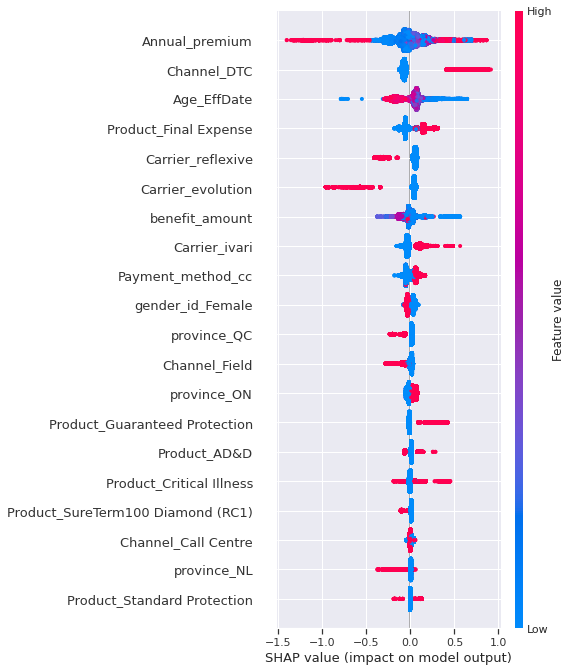

In [ ]:
shap.summary_plot(shap_values, X_importance)

**Findings based on above SHAP Plot**


1.   Higher the Annual premium, higher is the termination rate of the policies
2.   If the channel is not DTC, it is less likely to be terminated. Field and Call Center policies are better compared to DTC 
3.   It is possible that terminated policies have lower age among the members
4.   Product Final Expense and Product Guaranteed protection has highest chance of termination when compared to other products
5.   Policies assosciated with carriers Evolution and Reflexive have lower chance of getting terminated. Ivari carrier policies have higher chance of getting terminated compared to other carriers
6.   QC province has the lowest termination rate compared to other states






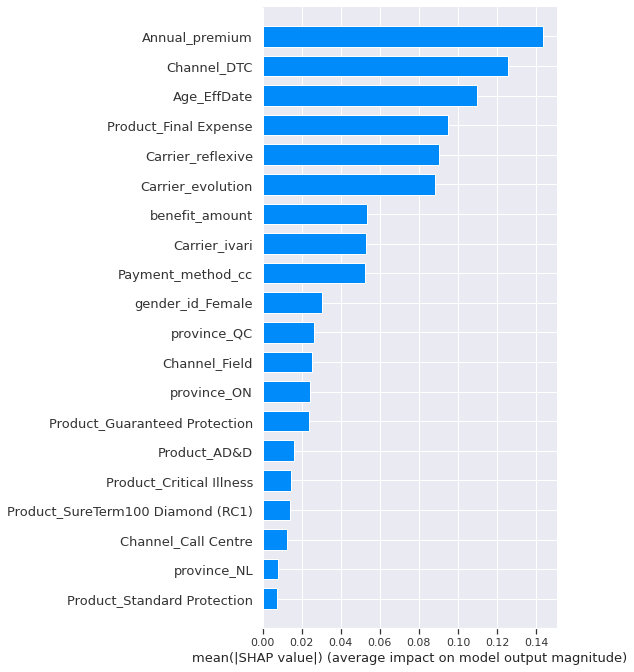

In [ ]:
shap.summary_plot(shap_values, X_importance, plot_type='bar')

### Interaction among variables

##### Annual Premium

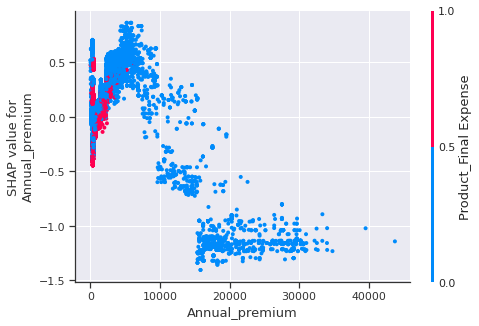

In [ ]:
shap.dependence_plot('Annual_premium', shap_values,X_train_ros)

##### DTC Channel

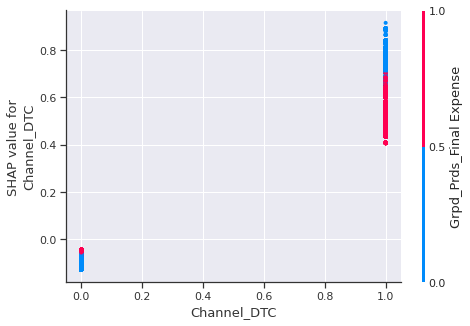

In [ ]:
shap.dependence_plot('Channel_DTC', shap_values,X_train_ros)

##### Benefit Amount

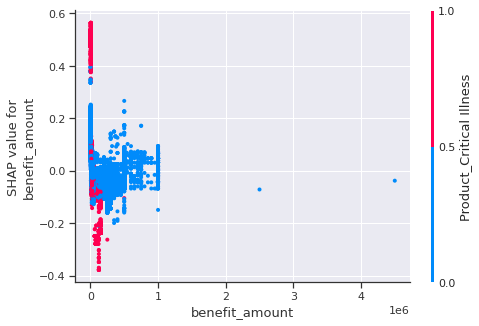

In [ ]:
shap.dependence_plot('benefit_amount', shap_values,X_train_ros)

#### Age

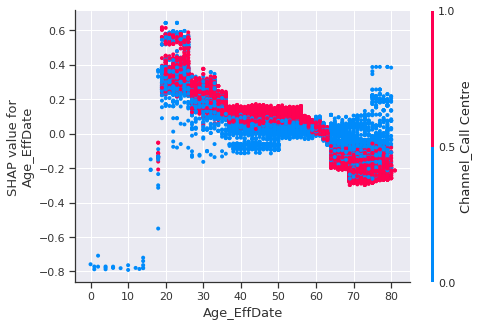

In [ ]:
shap.dependence_plot('Age_EffDate', shap_values,X_train_ros)

# Iteration 1

Use all the variables on standardized dataset

Dataset: X_train_std, y_train, X_test_std, y_test

Variables Considered 
1. Categorical - ['Product', 'Carrier', 'province', 'Grpd_Prds', 'gender_id','Payment_method','billing_frequency','Channel']
2. Continuous - Age, Annual Premium Amount, Benefit Amount



### Evaluate Model Function

In [ ]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
#Building the Model

lr= LogisticRegression()
lr.fit(X_train_std, y_train)

LogisticRegression()

In [ ]:
#Evaluate the Model
lr_eval=evaluate_model(lr, X_test_std, y_test)

# Print result
print('Accuracy:', lr_eval['acc'])
print('Precision for Terminated Policies:', lr_eval['prec'])
print('Recall for Terminated Policies:', lr_eval['rec'])   #For 1
print('F1 Score:', lr_eval['f1'])
print('Cohens Kappa Score:', lr_eval['kappa'])
print('Area Under Curve:', lr_eval['auc'])
print('Confusion Matrix:\n', lr_eval['cm'])

# confusion matrix

# TP is bottom right
# TN is top left
# FP is top right
# FN is bottom left

Accuracy: 0.6977312979674454
Precision for Terminated Policies: 0.4935483870967742
Recall for Terminated Policies: 0.08557046979865772
F1 Score: 0.14585319351763587
Cohens Kappa Score: 0.062276814735565456
Area Under Curve: 0.6387766178311204
Confusion Matrix:
 [[7967  314]
 [3270  306]]


In [ ]:
#From chaitanya's code
print('Recall score is', recall_score(y_test, lr.predict(X_test_std), average='micro'))
print('Precision score is',precision_score(y_test, lr.predict(X_test_std), average='macro'))

Recall score is 0.6977312979674454
Precision score is 0.6012727251849449


In [ ]:
#Confirmation for above function
print(classification_report(y_test, lr.predict(X_test_std)))

              precision    recall  f1-score   support

           0       0.71      0.96      0.82      8281
           1       0.49      0.09      0.15      3576

    accuracy                           0.70     11857
   macro avg       0.60      0.52      0.48     11857
weighted avg       0.64      0.70      0.61     11857



## Decision Tree

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=0, max_depth=2)
dt.fit(X_train_std, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [ ]:
#Evaluate the Model
dt_eval=evaluate_model(dt, X_test_std, y_test)

# Print result
print('Accuracy:', round(dt_eval['acc'],3))
print('Precision for Terminated Policies:', round(dt_eval['prec'],2))
print('Recall for Terminated Policies:', round(dt_eval['rec'],2))   #For 1
print('F1 Score:', round(dt_eval['f1'],2))
print('Cohens Kappa Score:', round(dt_eval['kappa'],2))
print('Area Under Curve:', round(dt_eval['auc'],2))
print('Confusion Matrix:\n', dt_eval['cm'])

# confusion matrix

# TP is bottom right
# TN is top left
# FP is top right
# FN is bottom left

Accuracy: 0.706
Precision for Terminated Policies: 0.7
Recall for Terminated Policies: 0.05
F1 Score: 0.09
Cohens Kappa Score: 0.05
Area Under Curve: 0.56
Confusion Matrix:
 [[8209   72]
 [3410  166]]


In [ ]:
#Confirmation for above function
print(classification_report(y_test, dt.predict(X_test_std)))

              precision    recall  f1-score   support

           0       0.71      0.99      0.83      8281
           1       0.70      0.05      0.09      3576

    accuracy                           0.71     11857
   macro avg       0.70      0.52      0.46     11857
weighted avg       0.70      0.71      0.60     11857



## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_std, y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
#Evaluate the Model
knn_eval=evaluate_model(knn, X_test_std, y_test)

# Print result
print('Accuracy:', round(knn_eval['acc'],3))
print('Precision for Terminated Policies:', round(knn_eval['prec'],2))
print('Recall for Terminated Policies:', round(knn_eval['rec'],2))   #For 1
print('F1 Score:', round(knn_eval['f1'],2))
print('Cohens Kappa Score:', round(knn_eval['kappa'],2))
print('Area Under Curve:', round(knn_eval['auc'],2))
print('Confusion Matrix:\n', knn_eval['cm'])

# confusion matrix

# TP is bottom right
# TN is top left
# FP is top right
# FN is bottom left

Accuracy: 0.685
Precision for Terminated Policies: 0.46
Recall for Terminated Policies: 0.27
F1 Score: 0.34
Cohens Kappa Score: 0.15
Area Under Curve: 0.61
Confusion Matrix:
 [[7169 1112]
 [2628  948]]


In [ ]:
#Confirmation for above function
print(classification_report(y_test, knn.predict(X_test_std)))

              precision    recall  f1-score   support

           0       0.73      0.87      0.79      8281
           1       0.46      0.27      0.34      3576

    accuracy                           0.68     11857
   macro avg       0.60      0.57      0.56     11857
weighted avg       0.65      0.68      0.66     11857



## XG Boost

In [ ]:
# fit model no training data
xg = XGBClassifier()
xg.fit(X_train_std, y_train)
# feature importance
#print(model.feature_importances_)

XGBClassifier()

In [ ]:
#Evaluate the Model
xg_eval=evaluate_model(xg, X_test_std, y_test)

# Print result
print('Accuracy:', round(xg_eval['acc'],3))
print('Precision for Housing Insecurity:', round(xg_eval['prec'],2))
print('Recall for Housing Insecurity:', round(xg_eval['rec'],2))   #For 1
print('F1 Score:', round(xg_eval['f1'],2))
print('Cohens Kappa Score:', round(xg_eval['kappa'],2))
print('Area Under Curve:', round(xg_eval['auc'],2))
print('Confusion Matrix:\n', xg_eval['cm'])

# confusion matrix

# TP is bottom right
# TN is top left
# FP is top right
# FN is bottom left

Accuracy: 0.71
Precision for Housing Insecurity: 0.62
Recall for Housing Insecurity: 0.1
F1 Score: 0.17
Cohens Kappa Score: 0.1
Area Under Curve: 0.68
Confusion Matrix:
 [[8063  218]
 [3216  360]]


In [ ]:
#Confirmation for above function
print(classification_report(y_test, xg.predict(X_test_std)))

              precision    recall  f1-score   support

           0       0.71      0.97      0.82      8281
           1       0.62      0.10      0.17      3576

    accuracy                           0.71     11857
   macro avg       0.67      0.54      0.50     11857
weighted avg       0.69      0.71      0.63     11857



## Random Forest

In [ ]:
# Model and performance
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [ ]:
# Train the random forest model , below results are without oversampling
rf = RandomForestClassifier()
rf.fit(X_train_std, y_train)


RandomForestClassifier()

In [ ]:
#Evaluate the Model
rf_eval=evaluate_model(rf, X_test_std, y_test)

# Print result
print('Accuracy:', rf_eval['acc'])
print('Precision for Housing Insecurity:', rf_eval['prec'])
print('Recall for Housing Insecurity:', rf_eval['rec'])   #For 1
print('F1 Score:', rf_eval['f1'])
print('Cohens Kappa Score:', rf_eval['kappa'])
print('Area Under Curve:', rf_eval['auc'])
print('Confusion Matrix:\n', rf_eval['cm'])

# confusion matrix

# TP is bottom right
# TN is top left
# FP is top right
# FN is bottom left

Accuracy: 0.6871046639116134
Precision for Housing Insecurity: 0.475092936802974
Recall for Housing Insecurity: 0.3573825503355705
F1 Score: 0.4079157357165656
Cohens Kappa Score: 0.20102067886561803
Area Under Curve: 0.6472244521095838
Confusion Matrix:
 [[6869 1412]
 [2298 1278]]


In [ ]:
#Confirmation for above function
print(classification_report(y_test, rf.predict(X_test_std)))

              precision    recall  f1-score   support

           0       0.75      0.83      0.79      8281
           1       0.48      0.36      0.41      3576

    accuracy                           0.69     11857
   macro avg       0.61      0.59      0.60     11857
weighted avg       0.67      0.69      0.67     11857



## Model Comparison

https://towardsdatascience.com/understanding-the-roc-curve-in-three-visual-steps-795b1399481c

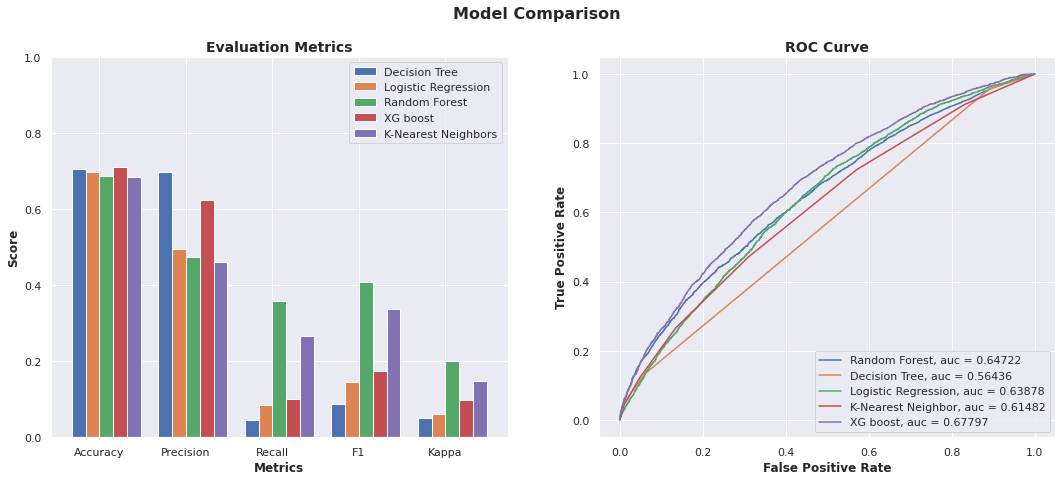

In [ ]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(18)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.16
#brf_score = [brf_eval['acc'], brf_eval['prec'], brf_eval['rec'], brf_eval['f1'], brf_eval['kappa']]
rf_score = [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1'], rf_eval['kappa']]
dt_score = [dt_eval['acc'], dt_eval['prec'], dt_eval['rec'], dt_eval['f1'], dt_eval['kappa']]
lr_score = [lr_eval['acc'], lr_eval['prec'], lr_eval['rec'], lr_eval['f1'], lr_eval['kappa']]
knn_score = [knn_eval['acc'], knn_eval['prec'], knn_eval['rec'], knn_eval['f1'], knn_eval['kappa']]
xg_score = [xg_eval['acc'], xg_eval['prec'], xg_eval['rec'], xg_eval['f1'], xg_eval['kappa']]

## Set position of bar on X axis
r1 = np.arange(len(dt_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
#r6 = [x + barWidth for x in r5]

## Make the plot
ax1.bar(r1, dt_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r2, lr_score, width=barWidth, edgecolor='white', label='Logistic Regression')
ax1.bar(r3, rf_score, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r4, xg_score, width=barWidth, edgecolor='white', label='XG boost')
ax1.bar(r5, knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')
#ax1.bar(r6, xg_score, width=barWidth, edgecolor='white', label='XG Boost')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(dt_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
#ax2.plot(brf_eval['fpr'], brf_eval['tpr'], label='Baseline RF, auc = {:0.5f}'.format(brf_eval['auc']))
ax2.plot(rf_eval['fpr'], rf_eval['tpr'], label='Random Forest, auc = {:0.5f}'.format(rf_eval['auc']))
ax2.plot(dt_eval['fpr'], dt_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(dt_eval['auc']))
ax2.plot(lr_eval['fpr'], lr_eval['tpr'], label='Logistic Regression, auc = {:0.5f}'.format(lr_eval['auc']))
ax2.plot(knn_eval['fpr'], knn_eval['tpr'], label='K-Nearest Neighbor, auc = {:0.5f}'.format(knn_eval['auc']))
ax2.plot(xg_eval['fpr'], xg_eval['tpr'], label='XG boost, auc = {:0.5f}'.format(xg_eval['auc']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()

# Iteration 2

*Exclude the variables which does not have significant XG Variable importance*




['Channel_DTC','Carrier_evolution','Carrier_reflexive','Product_Final Expense','Product_SureTerm100 Diamond (RC1)','Product_Guaranteed Protection','Carrier_ivari','Product_AD&D','Channel_Field','Annual_premium','Channel_Call Centre','province_QC','Product_Critical Illness','province_ON','Product_Preferred Protection','Age_EffDate','Carrier_chubb','benefit_amount','province_NL','Payment_method_cc','gender_id_Female','Product_Standard Protection','Product_Evolution T100 Essence','Product_Evolution T100 Advance+','province_NB','Product_Evolution T20 Advance+','province_NS','province_SK','Product_SureTerm30 Diamond (RC1)','province_AB','Product_Evolution T100 Express+','province_NU','province_BC']



## Prepare dataset

In [ ]:
X.shape

(59282, 91)

In [ ]:
X_2=X[['Channel_DTC','Carrier_evolution','Carrier_reflexive','Product_Final Expense','Product_SureTerm100 Diamond (RC1)','Product_Guaranteed Protection','Carrier_ivari','Product_AD&D','Channel_Field','Annual_premium','Channel_Call Centre','province_QC','Product_Critical Illness','province_ON','Product_Preferred Protection','Age_EffDate','Carrier_chubb','benefit_amount','province_NL','Payment_method_cc','gender_id_Female','Product_Standard Protection','Product_Evolution T100 Essence','Product_Evolution T100 Advance+','province_NB','Product_Evolution T20 Advance+','province_NS','province_SK','Product_SureTerm30 Diamond (RC1)','province_AB','Product_Evolution T100 Express+','province_NU','province_BC']]

In [ ]:
X_2.shape

(59282, 33)

In [ ]:
y.shape

(59282,)

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_2, y, train_size=0.8, shuffle=True, random_state=0)

## Standardizing data

In [ ]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## Evaluate Model Function

In [ ]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
#Building the Model

lr= LogisticRegression()
lr.fit(X_train_std, y_train)

LogisticRegression()

In [ ]:
#Evaluate the Model
lr_eval=evaluate_model(lr, X_test_std, y_test)

# Print result
print('Accuracy:', lr_eval['acc'])
print('Precision for Terminated Policies:', lr_eval['prec'])
print('Recall for Terminated Policies:', lr_eval['rec'])   #For 1
print('F1 Score:', lr_eval['f1'])
print('Cohens Kappa Score:', lr_eval['kappa'])
print('Area Under Curve:', lr_eval['auc'])
print('Confusion Matrix:\n', lr_eval['cm'])

# confusion matrix

# TP is bottom right
# TN is top left
# FP is top right
# FN is bottom left

Accuracy: 0.6978156363329678
Precision for Terminated Policies: 0.49429037520391517
Recall for Terminated Policies: 0.08473154362416108
F1 Score: 0.1446645977560277
Cohens Kappa Score: 0.06185665356962966
Area Under Curve: 0.638269338155023
Confusion Matrix:
 [[7971  310]
 [3273  303]]


In [ ]:
#From chaitanya's code
print('Recall score is', recall_score(y_test, lr.predict(X_test_std), average='micro'))
print('Precision score is',precision_score(y_test, lr.predict(X_test_std), average='macro'))

Recall score is 0.6978156363329678
Precision score is 0.6016008973138038


In [ ]:
#Confirmation for above function
print(classification_report(y_test, lr.predict(X_test_std)))

              precision    recall  f1-score   support

           0       0.71      0.96      0.82      8281
           1       0.49      0.08      0.14      3576

    accuracy                           0.70     11857
   macro avg       0.60      0.52      0.48     11857
weighted avg       0.64      0.70      0.61     11857



## Decision Tree

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=0, max_depth=2)
dt.fit(X_train_std, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [ ]:
#Evaluate the Model
dt_eval=evaluate_model(dt, X_test_std, y_test)

# Print result
print('Accuracy:', round(dt_eval['acc'],3))
print('Precision for Terminated Policies:', round(dt_eval['prec'],2))
print('Recall for Terminated Policies:', round(dt_eval['rec'],2))   #For 1
print('F1 Score:', round(dt_eval['f1'],2))
print('Cohens Kappa Score:', round(dt_eval['kappa'],2))
print('Area Under Curve:', round(dt_eval['auc'],2))
print('Confusion Matrix:\n', dt_eval['cm'])

# confusion matrix

# TP is bottom right
# TN is top left
# FP is top right
# FN is bottom left

Accuracy: 0.706
Precision for Terminated Policies: 0.7
Recall for Terminated Policies: 0.05
F1 Score: 0.09
Cohens Kappa Score: 0.05
Area Under Curve: 0.56
Confusion Matrix:
 [[8209   72]
 [3410  166]]


In [ ]:
#Confirmation for above function
print(classification_report(y_test, dt.predict(X_test_std)))

              precision    recall  f1-score   support

           0       0.71      0.99      0.83      8281
           1       0.70      0.05      0.09      3576

    accuracy                           0.71     11857
   macro avg       0.70      0.52      0.46     11857
weighted avg       0.70      0.71      0.60     11857



## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_std, y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
#Evaluate the Model
knn_eval=evaluate_model(knn, X_test_std, y_test)

# Print result
print('Accuracy:', round(knn_eval['acc'],3))
print('Precision for Terminated Policies:', round(knn_eval['prec'],2))
print('Recall for Terminated Policies:', round(knn_eval['rec'],2))   #For 1
print('F1 Score:', round(knn_eval['f1'],2))
print('Cohens Kappa Score:', round(knn_eval['kappa'],2))
print('Area Under Curve:', round(knn_eval['auc'],2))
print('Confusion Matrix:\n', knn_eval['cm'])

# confusion matrix

# TP is bottom right
# TN is top left
# FP is top right
# FN is bottom left

Accuracy: 0.683
Precision for Terminated Policies: 0.46
Recall for Terminated Policies: 0.26
F1 Score: 0.33
Cohens Kappa Score: 0.15
Area Under Curve: 0.62
Confusion Matrix:
 [[7158 1123]
 [2632  944]]


In [ ]:
#Confirmation for above function
print(classification_report(y_test, knn.predict(X_test_std)))

              precision    recall  f1-score   support

           0       0.73      0.86      0.79      8281
           1       0.46      0.26      0.33      3576

    accuracy                           0.68     11857
   macro avg       0.59      0.56      0.56     11857
weighted avg       0.65      0.68      0.65     11857



## XG Boost

In [ ]:
# fit model no training data
xg = XGBClassifier()
xg.fit(X_train_std, y_train)
# feature importance
#print(model.feature_importances_)

XGBClassifier()

In [ ]:
#Evaluate the Model
xg_eval=evaluate_model(xg, X_test_std, y_test)

# Print result
print('Accuracy:', round(xg_eval['acc'],3))
print('Precision for Housing Insecurity:', round(xg_eval['prec'],2))
print('Recall for Housing Insecurity:', round(xg_eval['rec'],2))   #For 1
print('F1 Score:', round(xg_eval['f1'],2))
print('Cohens Kappa Score:', round(xg_eval['kappa'],2))
print('Area Under Curve:', round(xg_eval['auc'],2))
print('Confusion Matrix:\n', xg_eval['cm'])

# confusion matrix

# TP is bottom right
# TN is top left
# FP is top right
# FN is bottom left

Accuracy: 0.71
Precision for Housing Insecurity: 0.62
Recall for Housing Insecurity: 0.1
F1 Score: 0.17
Cohens Kappa Score: 0.1
Area Under Curve: 0.68
Confusion Matrix:
 [[8062  219]
 [3222  354]]


In [ ]:
#Confirmation for above function
print(classification_report(y_test, xg.predict(X_test_std)))

              precision    recall  f1-score   support

           0       0.71      0.97      0.82      8281
           1       0.62      0.10      0.17      3576

    accuracy                           0.71     11857
   macro avg       0.67      0.54      0.50     11857
weighted avg       0.69      0.71      0.63     11857



## Random Forest

In [ ]:
# Model and performance
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [ ]:
# Train the random forest model , below results are without oversampling
rf = RandomForestClassifier()
rf.fit(X_train_std, y_train)


RandomForestClassifier()

In [ ]:
#Evaluate the Model
rf_eval=evaluate_model(rf, X_test_std, y_test)

# Print result
print('Accuracy:', rf_eval['acc'])
print('Precision for Housing Insecurity:', rf_eval['prec'])
print('Recall for Housing Insecurity:', rf_eval['rec'])   #For 1
print('F1 Score:', rf_eval['f1'])
print('Cohens Kappa Score:', rf_eval['kappa'])
print('Area Under Curve:', rf_eval['auc'])
print('Confusion Matrix:\n', rf_eval['cm'])

# confusion matrix

# TP is bottom right
# TN is top left
# FP is top right
# FN is bottom left

Accuracy: 0.6881167242978831
Precision for Housing Insecurity: 0.4765204003079292
Recall for Housing Insecurity: 0.34619686800894856
F1 Score: 0.4010366051182378
Cohens Kappa Score: 0.19729408686131944
Area Under Curve: 0.6481560407412239
Confusion Matrix:
 [[6921 1360]
 [2338 1238]]


In [ ]:
#Confirmation for above function
print(classification_report(y_test, rf.predict(X_test_std)))

              precision    recall  f1-score   support

           0       0.75      0.84      0.79      8281
           1       0.48      0.35      0.40      3576

    accuracy                           0.69     11857
   macro avg       0.61      0.59      0.60     11857
weighted avg       0.67      0.69      0.67     11857



## Model Comparison

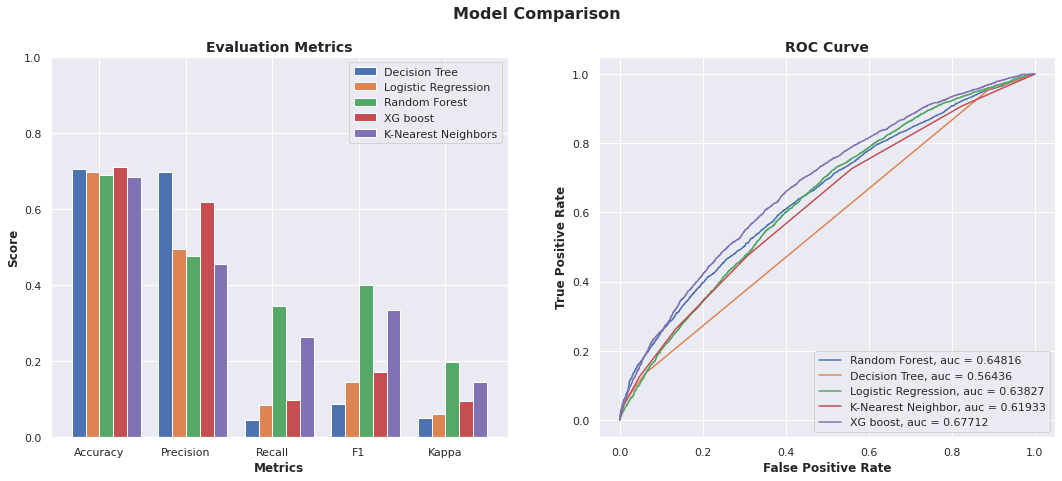

In [ ]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(18)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.16
#brf_score = [brf_eval['acc'], brf_eval['prec'], brf_eval['rec'], brf_eval['f1'], brf_eval['kappa']]
rf_score = [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1'], rf_eval['kappa']]
dt_score = [dt_eval['acc'], dt_eval['prec'], dt_eval['rec'], dt_eval['f1'], dt_eval['kappa']]
lr_score = [lr_eval['acc'], lr_eval['prec'], lr_eval['rec'], lr_eval['f1'], lr_eval['kappa']]
knn_score = [knn_eval['acc'], knn_eval['prec'], knn_eval['rec'], knn_eval['f1'], knn_eval['kappa']]
xg_score = [xg_eval['acc'], xg_eval['prec'], xg_eval['rec'], xg_eval['f1'], xg_eval['kappa']]

## Set position of bar on X axis
r1 = np.arange(len(dt_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
#r6 = [x + barWidth for x in r5]

## Make the plot
ax1.bar(r1, dt_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r2, lr_score, width=barWidth, edgecolor='white', label='Logistic Regression')
ax1.bar(r3, rf_score, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r4, xg_score, width=barWidth, edgecolor='white', label='XG boost')
ax1.bar(r5, knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')
#ax1.bar(r6, xg_score, width=barWidth, edgecolor='white', label='XG Boost')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(dt_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
#ax2.plot(brf_eval['fpr'], brf_eval['tpr'], label='Baseline RF, auc = {:0.5f}'.format(brf_eval['auc']))
ax2.plot(rf_eval['fpr'], rf_eval['tpr'], label='Random Forest, auc = {:0.5f}'.format(rf_eval['auc']))
ax2.plot(dt_eval['fpr'], dt_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(dt_eval['auc']))
ax2.plot(lr_eval['fpr'], lr_eval['tpr'], label='Logistic Regression, auc = {:0.5f}'.format(lr_eval['auc']))
ax2.plot(knn_eval['fpr'], knn_eval['tpr'], label='K-Nearest Neighbor, auc = {:0.5f}'.format(knn_eval['auc']))
ax2.plot(xg_eval['fpr'], xg_eval['tpr'], label='XG boost, auc = {:0.5f}'.format(xg_eval['auc']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()

# Iteration 3

*Exclude the variables which does not have any significant SHAP value*



['Channel_DTC','Annual_premium','Age_EffDate','Payment_method_cc','benefit_amount','Product_Evolution T20 Advance+','Product_Evolution T100 Essence','Product_SureTerm30 Diamond (RC1)','province_NU','province_BC','province_SK','Product_Evolution T100 Express+','Product_SureTerm100 Platinum (RC2)','Grpd_Prds_Others','Product_SureTerm10 Diamond (RC1)','Product_SureTerm100 Gold (RC3)','Product_Evolution T30 Advance','Grpd_Prds_Standard Protection','Product_SureTerm100 Silver (RC4)','Product_SureTerm20 Diamond (RC1)','Product_Evolution Jr. Critical Illness Guaranteed Issue','province_NT','Grpd_Prds_SureTerm100 Diamond (RC1)','Product_Evolution T20 Express','province_PE','Grpd_Prds_Final Expense','billing_frequency_Annual','Product_Preferred Protection Term 10','Product_Evolution T100 Advance','Product_Standard Protection Term 10','province_Alberta']


## Prepare dataset

In [ ]:
X.shape

(59282, 91)

In [ ]:
X_3=X[['Channel_DTC','Annual_premium','Age_EffDate','Payment_method_cc','benefit_amount','Product_Evolution T20 Advance+','Product_Evolution T100 Essence','Product_SureTerm30 Diamond (RC1)','province_NU','province_BC','province_SK','Product_Evolution T100 Express+','Product_SureTerm100 Platinum (RC2)','Grpd_Prds_Others','Product_SureTerm10 Diamond (RC1)','Product_SureTerm100 Gold (RC3)','Product_Evolution T30 Advance','Grpd_Prds_Standard Protection','Product_SureTerm100 Silver (RC4)','Product_SureTerm20 Diamond (RC1)','Product_Evolution Jr. Critical Illness Guaranteed Issue','province_NT','Grpd_Prds_SureTerm100 Diamond (RC1)','Product_Evolution T20 Express','province_PE','Grpd_Prds_Final Expense','billing_frequency_Annual','Product_Preferred Protection Term 10','Product_Evolution T100 Advance','Product_Standard Protection Term 10','province_Alberta']]

In [ ]:
X.shape

(59282, 31)

In [ ]:
y.shape

(59282,)

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_3, y, train_size=0.8, shuffle=True, random_state=0)

## Standardizing data

In [ ]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## Evaluate Model Function

In [ ]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
#Building the Model

lr= LogisticRegression()
lr.fit(X_train_std, y_train)

LogisticRegression()

In [ ]:
#Evaluate the Model
lr_eval=evaluate_model(lr, X_test_std, y_test)

# Print result
print('Accuracy:', lr_eval['acc'])
print('Precision for Terminated Policies:', lr_eval['prec'])
print('Recall for Terminated Policies:', lr_eval['rec'])   #For 1
print('F1 Score:', lr_eval['f1'])
print('Cohens Kappa Score:', lr_eval['kappa'])
print('Area Under Curve:', lr_eval['auc'])
print('Confusion Matrix:\n', lr_eval['cm'])

# confusion matrix

# TP is bottom right
# TN is top left
# FP is top right
# FN is bottom left

Accuracy: 0.6978156363329678
Precision for Terminated Policies: 0.49429037520391517
Recall for Terminated Policies: 0.08473154362416108
F1 Score: 0.1446645977560277
Cohens Kappa Score: 0.06185665356962966
Area Under Curve: 0.6148722703409627
Confusion Matrix:
 [[7971  310]
 [3273  303]]


In [ ]:
#From chaitanya's code
print('Recall score is', recall_score(y_test, lr.predict(X_test_std), average='micro'))
print('Precision score is',precision_score(y_test, lr.predict(X_test_std), average='macro'))

Recall score is 0.6978156363329678
Precision score is 0.6016008973138038


In [ ]:
#Confirmation for above function
print(classification_report(y_test, lr.predict(X_test_std)))

              precision    recall  f1-score   support

           0       0.71      0.96      0.82      8281
           1       0.49      0.08      0.14      3576

    accuracy                           0.70     11857
   macro avg       0.60      0.52      0.48     11857
weighted avg       0.64      0.70      0.61     11857



## Decision Tree

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=0, max_depth=2)
dt.fit(X_train_std, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [ ]:
#Evaluate the Model
dt_eval=evaluate_model(dt, X_test_std, y_test)

# Print result
print('Accuracy:', round(dt_eval['acc'],3))
print('Precision for Terminated Policies:', round(dt_eval['prec'],2))
print('Recall for Terminated Policies:', round(dt_eval['rec'],2))   #For 1
print('F1 Score:', round(dt_eval['f1'],2))
print('Cohens Kappa Score:', round(dt_eval['kappa'],2))
print('Area Under Curve:', round(dt_eval['auc'],2))
print('Confusion Matrix:\n', dt_eval['cm'])

# confusion matrix

# TP is bottom right
# TN is top left
# FP is top right
# FN is bottom left

Accuracy: 0.706
Precision for Terminated Policies: 0.7
Recall for Terminated Policies: 0.05
F1 Score: 0.09
Cohens Kappa Score: 0.05
Area Under Curve: 0.58
Confusion Matrix:
 [[8209   72]
 [3410  166]]


In [ ]:
#Confirmation for above function
print(classification_report(y_test, dt.predict(X_test_std)))

              precision    recall  f1-score   support

           0       0.71      0.99      0.83      8281
           1       0.70      0.05      0.09      3576

    accuracy                           0.71     11857
   macro avg       0.70      0.52      0.46     11857
weighted avg       0.70      0.71      0.60     11857



## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_std, y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
#Evaluate the Model
knn_eval=evaluate_model(knn, X_test_std, y_test)

# Print result
print('Accuracy:', round(knn_eval['acc'],3))
print('Precision for Terminated Policies:', round(knn_eval['prec'],2))
print('Recall for Terminated Policies:', round(knn_eval['rec'],2))   #For 1
print('F1 Score:', round(knn_eval['f1'],2))
print('Cohens Kappa Score:', round(knn_eval['kappa'],2))
print('Area Under Curve:', round(knn_eval['auc'],2))
print('Confusion Matrix:\n', knn_eval['cm'])

# confusion matrix

# TP is bottom right
# TN is top left
# FP is top right
# FN is bottom left

Accuracy: 0.687
Precision for Terminated Policies: 0.47
Recall for Terminated Policies: 0.26
F1 Score: 0.34
Cohens Kappa Score: 0.15
Area Under Curve: 0.62
Confusion Matrix:
 [[7200 1081]
 [2632  944]]


In [ ]:
#Confirmation for above function
print(classification_report(y_test, knn.predict(X_test_std)))

              precision    recall  f1-score   support

           0       0.73      0.87      0.80      8281
           1       0.47      0.26      0.34      3576

    accuracy                           0.69     11857
   macro avg       0.60      0.57      0.57     11857
weighted avg       0.65      0.69      0.66     11857



## XG Boost

In [ ]:
# fit model no training data
xg = XGBClassifier()
xg.fit(X_train_std, y_train)
# feature importance
#print(model.feature_importances_)

XGBClassifier()

In [ ]:
#Evaluate the Model
xg_eval=evaluate_model(xg, X_test_std, y_test)

# Print result
print('Accuracy:', round(xg_eval['acc'],3))
print('Precision for Housing Insecurity:', round(xg_eval['prec'],2))
print('Recall for Housing Insecurity:', round(xg_eval['rec'],2))   #For 1
print('F1 Score:', round(xg_eval['f1'],2))
print('Cohens Kappa Score:', round(xg_eval['kappa'],2))
print('Area Under Curve:', round(xg_eval['auc'],2))
print('Confusion Matrix:\n', xg_eval['cm'])

# confusion matrix

# TP is bottom right
# TN is top left
# FP is top right
# FN is bottom left

Accuracy: 0.708
Precision for Housing Insecurity: 0.62
Recall for Housing Insecurity: 0.08
F1 Score: 0.15
Cohens Kappa Score: 0.08
Area Under Curve: 0.66
Confusion Matrix:
 [[8099  182]
 [3278  298]]


In [ ]:
#Confirmation for above function
print(classification_report(y_test, xg.predict(X_test_std)))

              precision    recall  f1-score   support

           0       0.71      0.98      0.82      8281
           1       0.62      0.08      0.15      3576

    accuracy                           0.71     11857
   macro avg       0.67      0.53      0.49     11857
weighted avg       0.68      0.71      0.62     11857



## Random Forest

In [ ]:
# Model and performance
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [ ]:
# Train the random forest model , below results are without oversampling
rf = RandomForestClassifier()
rf.fit(X_train_std, y_train)


RandomForestClassifier()

In [ ]:
#Evaluate the Model
rf_eval=evaluate_model(rf, X_test_std, y_test)

# Print result
print('Accuracy:', rf_eval['acc'])
print('Precision for Housing Insecurity:', rf_eval['prec'])
print('Recall for Housing Insecurity:', rf_eval['rec'])   #For 1
print('F1 Score:', rf_eval['f1'])
print('Cohens Kappa Score:', rf_eval['kappa'])
print('Area Under Curve:', rf_eval['auc'])
print('Confusion Matrix:\n', rf_eval['cm'])

# confusion matrix

# TP is bottom right
# TN is top left
# FP is top right
# FN is bottom left

Accuracy: 0.6982373281605803
Precision for Housing Insecurity: 0.49958228905597324
Recall for Housing Insecurity: 0.3344519015659955
F1 Score: 0.4006700167504187
Cohens Kappa Score: 0.20945087583385347
Area Under Curve: 0.6484906926910393
Confusion Matrix:
 [[7083 1198]
 [2380 1196]]


In [ ]:
#Confirmation for above function
print(classification_report(y_test, rf.predict(X_test_std)))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80      8281
           1       0.50      0.33      0.40      3576

    accuracy                           0.70     11857
   macro avg       0.62      0.59      0.60     11857
weighted avg       0.67      0.70      0.68     11857



## Model Comparison

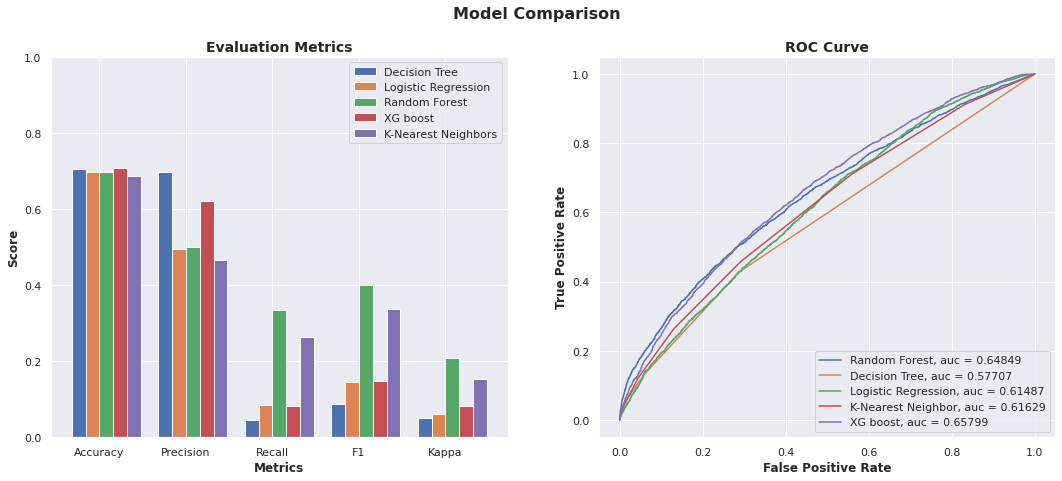

In [ ]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(18)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.16
#brf_score = [brf_eval['acc'], brf_eval['prec'], brf_eval['rec'], brf_eval['f1'], brf_eval['kappa']]
rf_score = [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1'], rf_eval['kappa']]
dt_score = [dt_eval['acc'], dt_eval['prec'], dt_eval['rec'], dt_eval['f1'], dt_eval['kappa']]
lr_score = [lr_eval['acc'], lr_eval['prec'], lr_eval['rec'], lr_eval['f1'], lr_eval['kappa']]
knn_score = [knn_eval['acc'], knn_eval['prec'], knn_eval['rec'], knn_eval['f1'], knn_eval['kappa']]
xg_score = [xg_eval['acc'], xg_eval['prec'], xg_eval['rec'], xg_eval['f1'], xg_eval['kappa']]

## Set position of bar on X axis
r1 = np.arange(len(dt_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
#r6 = [x + barWidth for x in r5]

## Make the plot
ax1.bar(r1, dt_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r2, lr_score, width=barWidth, edgecolor='white', label='Logistic Regression')
ax1.bar(r3, rf_score, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r4, xg_score, width=barWidth, edgecolor='white', label='XG boost')
ax1.bar(r5, knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')
#ax1.bar(r6, xg_score, width=barWidth, edgecolor='white', label='XG Boost')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(dt_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
#ax2.plot(brf_eval['fpr'], brf_eval['tpr'], label='Baseline RF, auc = {:0.5f}'.format(brf_eval['auc']))
ax2.plot(rf_eval['fpr'], rf_eval['tpr'], label='Random Forest, auc = {:0.5f}'.format(rf_eval['auc']))
ax2.plot(dt_eval['fpr'], dt_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(dt_eval['auc']))
ax2.plot(lr_eval['fpr'], lr_eval['tpr'], label='Logistic Regression, auc = {:0.5f}'.format(lr_eval['auc']))
ax2.plot(knn_eval['fpr'], knn_eval['tpr'], label='K-Nearest Neighbor, auc = {:0.5f}'.format(knn_eval['auc']))
ax2.plot(xg_eval['fpr'], xg_eval['tpr'], label='XG boost, auc = {:0.5f}'.format(xg_eval['auc']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()

# Iteration 4

Use oversampling and preform modeling on the combination variables which already best results in above three


## Prepare dataset

In [ ]:
X_2=X[['Channel_DTC','Carrier_evolution','Carrier_reflexive','Product_Final Expense','Product_SureTerm100 Diamond (RC1)','Product_Guaranteed Protection','Carrier_ivari','Product_AD&D','Channel_Field','Annual_premium','Channel_Call Centre','province_QC','Product_Critical Illness','province_ON','Product_Preferred Protection','Age_EffDate','Carrier_chubb','benefit_amount','province_NL','Payment_method_cc','gender_id_Female','Product_Standard Protection','Product_Evolution T100 Essence','Product_Evolution T100 Advance+','province_NB','Product_Evolution T20 Advance+','province_NS','province_SK','Product_SureTerm30 Diamond (RC1)','province_AB','Product_Evolution T100 Express+','province_NU','province_BC']]

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_2, y, train_size=0.8, shuffle=True, random_state=0)

In [ ]:
# Randomly over sample the minority class
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros= ros.fit_resample(X_train, y_train)
# Check the number of records after over sampling
print(sorted(Counter(y_train).items()))
print(sorted(Counter(y_train_ros).items()))

[(0, 33025), (1, 14400)]
[(0, 33025), (1, 33025)]


## Standardizing data

In [ ]:
sc = StandardScaler()
sc.fit(X_train_ros)
X_train_std = sc.transform(X_train_ros)
X_test_std = sc.transform(X_test)

## Evaluate Model Function

In [ ]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred=np.round(model.predict(X_test_std),0)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
#Building the Model

lr= LogisticRegression()
lr.fit(X_train_std, y_train_ros)

LogisticRegression()

In [ ]:
#Evaluate the Model
lr_eval=evaluate_model(lr, X_test_std, y_test)

# Print result
print('Accuracy:', lr_eval['acc'])
print('Precision for Terminated Policies:', lr_eval['prec'])
print('Recall for Terminated Policies:', lr_eval['rec'])   #For 1
print('F1 Score:', lr_eval['f1'])
print('Cohens Kappa Score:', lr_eval['kappa'])
print('Area Under Curve:', lr_eval['auc'])
print('Confusion Matrix:\n', lr_eval['cm'])

# confusion matrix

# TP is bottom right
# TN is top left
# FP is top right
# FN is bottom left

Accuracy: 0.5816817070085182
Precision for Terminated Policies: 0.3852785145888594
Recall for Terminated Policies: 0.6498881431767338
F1 Score: 0.4837635303913405
Cohens Kappa Score: 0.16911938979496144
Area Under Curve: 0.6385847079390112
Confusion Matrix:
 [[4573 3708]
 [1252 2324]]


In [ ]:
#From chaitanya's code
print('Recall score is', recall_score(y_test, lr.predict(X_test_std), average='micro'))
print('Precision score is',precision_score(y_test, lr.predict(X_test_std), average='macro'))

Recall score is 0.5816817070085182
Precision score is 0.5851714461356314


In [ ]:
#Confirmation for above function
print(classification_report(y_test, lr.predict(X_test_std)))

              precision    recall  f1-score   support

           0       0.79      0.55      0.65      8281
           1       0.39      0.65      0.48      3576

    accuracy                           0.58     11857
   macro avg       0.59      0.60      0.57     11857
weighted avg       0.66      0.58      0.60     11857



## Decision Tree

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=0, max_depth=2)
dt.fit(X_train_std, y_train_ros)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [ ]:
#Evaluate the Model
dt_eval=evaluate_model(dt, X_test_std, y_test)

# Print result
print('Accuracy:', round(dt_eval['acc'],3))
print('Precision for Terminated Policies:', round(dt_eval['prec'],2))
print('Recall for Terminated Policies:', round(dt_eval['rec'],2))   #For 1
print('F1 Score:', round(dt_eval['f1'],2))
print('Cohens Kappa Score:', round(dt_eval['kappa'],2))
print('Area Under Curve:', round(dt_eval['auc'],2))
print('Confusion Matrix:\n', dt_eval['cm'])

# confusion matrix

# TP is bottom right
# TN is top left
# FP is top right
# FN is bottom left

Accuracy: 0.697
Precision for Terminated Policies: 0.49
Recall for Terminated Policies: 0.13
F1 Score: 0.21
Cohens Kappa Score: 0.09
Area Under Curve: 0.56
Confusion Matrix:
 [[7783  498]
 [3100  476]]


In [ ]:
#Confirmation for above function
print(classification_report(y_test, dt.predict(X_test_std)))

              precision    recall  f1-score   support

           0       0.72      0.94      0.81      8281
           1       0.49      0.13      0.21      3576

    accuracy                           0.70     11857
   macro avg       0.60      0.54      0.51     11857
weighted avg       0.65      0.70      0.63     11857



## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_std, y_train_ros)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
#Evaluate the Model
knn_eval=evaluate_model(knn, X_test_std, y_test)

# Print result
print('Accuracy:', round(knn_eval['acc'],3))
print('Precision for Terminated Policies:', round(knn_eval['prec'],2))
print('Recall for Terminated Policies:', round(knn_eval['rec'],2))   #For 1
print('F1 Score:', round(knn_eval['f1'],2))
print('Cohens Kappa Score:', round(knn_eval['kappa'],2))
print('Area Under Curve:', round(knn_eval['auc'],2))
print('Confusion Matrix:\n', knn_eval['cm'])

# confusion matrix

# TP is bottom right
# TN is top left
# FP is top right
# FN is bottom left

Accuracy: 0.588
Precision for Terminated Policies: 0.37
Recall for Terminated Policies: 0.55
F1 Score: 0.44
Cohens Kappa Score: 0.13
Area Under Curve: 0.61
Confusion Matrix:
 [[5013 3268]
 [1622 1954]]


In [ ]:
#Confirmation for above function
print(classification_report(y_test, knn.predict(X_test_std)))

              precision    recall  f1-score   support

           0       0.76      0.61      0.67      8281
           1       0.37      0.55      0.44      3576

    accuracy                           0.59     11857
   macro avg       0.56      0.58      0.56     11857
weighted avg       0.64      0.59      0.60     11857



## XG Boost

In [ ]:
# fit model no training data
xg = XGBClassifier()
xg.fit(X_train_std, y_train_ros)
# feature importance
#print(model.feature_importances_)

XGBClassifier()

In [ ]:
#Evaluate the Model
xg_eval=evaluate_model(xg, X_test_std, y_test)

# Print result
print('Accuracy:', round(xg_eval['acc'],3))
print('Precision for Housing Insecurity:', round(xg_eval['prec'],2))
print('Recall for Housing Insecurity:', round(xg_eval['rec'],2))   #For 1
print('F1 Score:', round(xg_eval['f1'],2))
print('Cohens Kappa Score:', round(xg_eval['kappa'],2))
print('Area Under Curve:', round(xg_eval['auc'],2))
print('Confusion Matrix:\n', xg_eval['cm'])

# confusion matrix

# TP is bottom right
# TN is top left
# FP is top right
# FN is bottom left

Accuracy: 0.624
Precision for Housing Insecurity: 0.42
Recall for Housing Insecurity: 0.64
F1 Score: 0.51
Cohens Kappa Score: 0.22
Area Under Curve: 0.68
Confusion Matrix:
 [[5114 3167]
 [1290 2286]]


In [ ]:
#Confirmation for above function
print(classification_report(y_test, xg.predict(X_test_std)))

              precision    recall  f1-score   support

           0       0.80      0.62      0.70      8281
           1       0.42      0.64      0.51      3576

    accuracy                           0.62     11857
   macro avg       0.61      0.63      0.60     11857
weighted avg       0.68      0.62      0.64     11857



## Random Forest

In [ ]:
# Model and performance
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [ ]:
# Train the random forest model , below results are without oversampling
rf = RandomForestClassifier()
rf.fit(X_train_std, y_train_ros)


RandomForestClassifier()

In [ ]:
#Evaluate the Model
rf_eval=evaluate_model(rf, X_test_std, y_test)

# Print result
print('Accuracy:', rf_eval['acc'])
print('Precision for Housing Insecurity:', rf_eval['prec'])
print('Recall for Housing Insecurity:', rf_eval['rec'])   #For 1
print('F1 Score:', rf_eval['f1'])
print('Cohens Kappa Score:', rf_eval['kappa'])
print('Area Under Curve:', rf_eval['auc'])
print('Confusion Matrix:\n', rf_eval['cm'])

# confusion matrix

# TP is bottom right
# TN is top left
# FP is top right
# FN is bottom left

Accuracy: 0.6553934384751624
Precision for Housing Insecurity: 0.43078175895765475
Recall for Housing Insecurity: 0.4437919463087248
F1 Score: 0.4371900826446281
Cohens Kappa Score: 0.18894060272557012
Area Under Curve: 0.642391196580296
Confusion Matrix:
 [[6184 2097]
 [1989 1587]]


In [ ]:
#Confirmation for above function
print(classification_report(y_test, rf.predict(X_test_std)))

              precision    recall  f1-score   support

           0       0.76      0.75      0.75      8281
           1       0.43      0.44      0.44      3576

    accuracy                           0.66     11857
   macro avg       0.59      0.60      0.59     11857
weighted avg       0.66      0.66      0.66     11857



## Neural Networks

In [ ]:
# for data prep
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# neural net modules
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [ ]:
#Model code (Building the model)
model=Sequential()
model.add(Dense(36,input_shape=(X_train_std.shape[1],),activation='relu'))
model.add(Dense(24,activation='relu'))
# model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 36)                1224      
                                                                 
 dense_1 (Dense)             (None, 24)                888       
                                                                 
 dense_2 (Dense)             (None, 8)                 200       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2,321
Trainable params: 2,321
Non-trainable params: 0
_________________________________________________________________


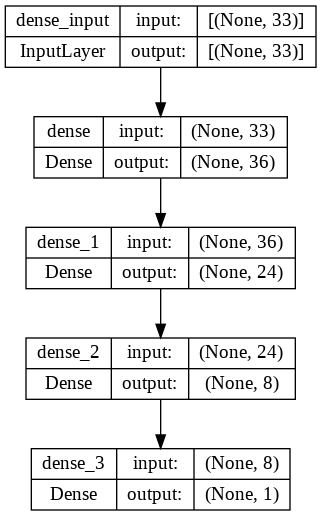

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
# compile the model (Telling how to run based on cost function optimizer and which variable to check)
model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# early stopping callback
# This callback will stop the training when there is no improvement in  
# the validation loss for 10 consecutive epochs.  
es = EarlyStopping(monitor='val_accuracy', 
                                   mode='max', # don't minimize the accuracy!
                                   patience=10,
                                   restore_best_weights=True)

# now we just update our model fit call
history = model.fit(X_train_std,
                    y_train_ros,
                    callbacks=[es],
                    epochs=100000, # you can set this to a big number!
                    batch_size=10,
                    validation_split=0.1,
                    shuffle=True,
                    verbose=1)

Epoch 1/100000
5945/5945 [==============================] - 13s 2ms/step - loss: 0.6577 - accuracy: 0.6024 - val_loss: 0.7709 - val_accuracy: 0.5145
Epoch 2/100000
5945/5945 [==============================] - 12s 2ms/step - loss: 0.6500 - accuracy: 0.6172 - val_loss: 0.7371 - val_accuracy: 0.5310
Epoch 3/100000
5945/5945 [==============================] - 12s 2ms/step - loss: 0.6491 - accuracy: 0.6206 - val_loss: 0.7379 - val_accuracy: 0.4742
Epoch 4/100000
5945/5945 [==============================] - 11s 2ms/step - loss: 0.6479 - accuracy: 0.6219 - val_loss: 0.7970 - val_accuracy: 0.4338
Epoch 5/100000
5945/5945 [==============================] - 12s 2ms/step - loss: 0.6472 - accuracy: 0.6222 - val_loss: 0.7065 - val_accuracy: 0.5375
Epoch 6/100000
5945/5945 [==============================] - 11s 2ms/step - loss: 0.6480 - accuracy: 0.6230 - val_loss: 0.7340 - val_accuracy: 0.4977
Epoch 7/100000
5945/5945 [==============================] - 12s 2ms/step - loss: 0.6475 - accuracy: 0.6223

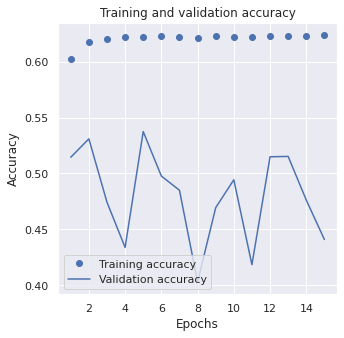

In [ ]:
# learning curve
import matplotlib.pyplot as plt

# accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# loss
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, acc, 'bo', label='Training accuracy')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
# check model performance
preds = np.round(model.predict(X_test_std),0)
#nn_eval=evaluate_model(model, X_test_std, y_test)
# confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, preds) # order matters! (actual, predicted)

# TP is bottom right
# TN is top left
# FP is top right
# FN is bottom left

371/371 [==============================] - 1s 1ms/step


array([[5757, 2524],
       [1748, 1828]])

In [ ]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.77      0.70      0.73      8281
           1       0.42      0.51      0.46      3576

    accuracy                           0.64     11857
   macro avg       0.59      0.60      0.60     11857
weighted avg       0.66      0.64      0.65     11857



In [ ]:
y_pred=np.round(model.predict(X_test_std),0)

371/371 [==============================] - 1s 2ms/step


In [ ]:
from sklearn import metrics
acc = metrics.accuracy_score(y_test, y_pred)

In [ ]:
y_pred_proba = lr.predict_proba(X_test_std)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

In [ ]:
auc

0.6385847079390112

## Model Comparison

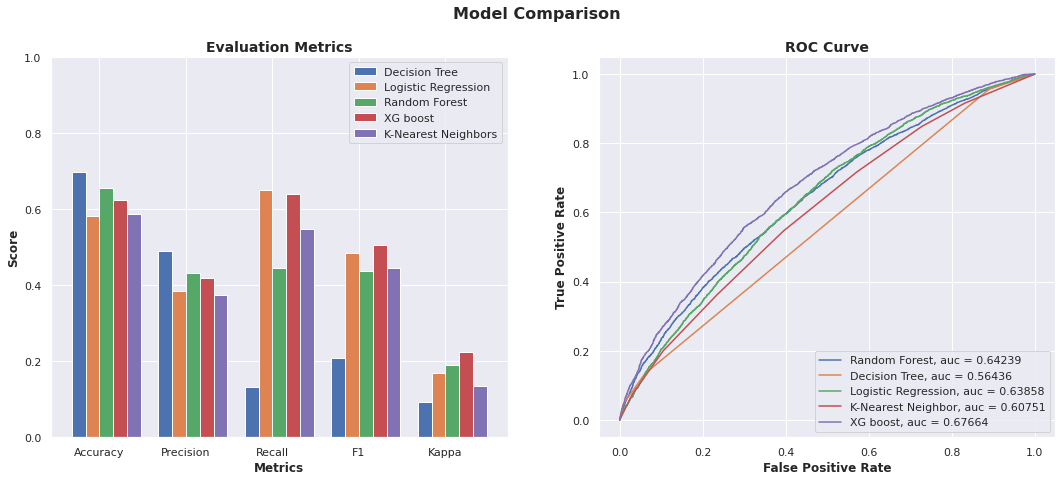

In [ ]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(18)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.16
#brf_score = [brf_eval['acc'], brf_eval['prec'], brf_eval['rec'], brf_eval['f1'], brf_eval['kappa']]
rf_score = [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1'], rf_eval['kappa']]
dt_score = [dt_eval['acc'], dt_eval['prec'], dt_eval['rec'], dt_eval['f1'], dt_eval['kappa']]
lr_score = [lr_eval['acc'], lr_eval['prec'], lr_eval['rec'], lr_eval['f1'], lr_eval['kappa']]
knn_score = [knn_eval['acc'], knn_eval['prec'], knn_eval['rec'], knn_eval['f1'], knn_eval['kappa']]
xg_score = [xg_eval['acc'], xg_eval['prec'], xg_eval['rec'], xg_eval['f1'], xg_eval['kappa']]

## Set position of bar on X axis
r1 = np.arange(len(dt_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
#r6 = [x + barWidth for x in r5]

## Make the plot
ax1.bar(r1, dt_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r2, lr_score, width=barWidth, edgecolor='white', label='Logistic Regression')
ax1.bar(r3, rf_score, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r4, xg_score, width=barWidth, edgecolor='white', label='XG boost')
ax1.bar(r5, knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')
#ax1.bar(r6, xg_score, width=barWidth, edgecolor='white', label='XG Boost')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(dt_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
#ax2.plot(brf_eval['fpr'], brf_eval['tpr'], label='Baseline RF, auc = {:0.5f}'.format(brf_eval['auc']))
ax2.plot(rf_eval['fpr'], rf_eval['tpr'], label='Random Forest, auc = {:0.5f}'.format(rf_eval['auc']))
ax2.plot(dt_eval['fpr'], dt_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(dt_eval['auc']))
ax2.plot(lr_eval['fpr'], lr_eval['tpr'], label='Logistic Regression, auc = {:0.5f}'.format(lr_eval['auc']))
ax2.plot(knn_eval['fpr'], knn_eval['tpr'], label='K-Nearest Neighbor, auc = {:0.5f}'.format(knn_eval['auc']))
ax2.plot(xg_eval['fpr'], xg_eval['tpr'], label='XG boost, auc = {:0.5f}'.format(xg_eval['auc']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()

# Lift Curve

In [ ]:
def plot_lift_curve(y_val, y_pred, step=0.01):
    
    #Define an auxiliar dataframe to plot the curve
    aux_lift = pd.DataFrame()
    #Create a real and predicted column for our new DataFrame and assign values
    aux_lift['real'] = y_val
    aux_lift['predicted'] = y_pred
    #Order the values for the predicted probability column:
    aux_lift.sort_values('predicted',ascending=False,inplace=True)
    
    #Create the values that will go into the X axis of our plot
    x_val = np.arange(step,1+step,step)
    #Calculate the ratio of ones in our data
    ratio_ones = aux_lift['real'].sum() / len(aux_lift)
    #Create an empty vector with the values that will go on the Y axis our our plot
    y_v = []
    
    #Calculate for each x value its correspondent y value
    for x in x_val:
        num_data = int(np.ceil(x*len(aux_lift))) #The ceil function returns the closest integer bigger than our number 
        data_here = aux_lift.iloc[:num_data,:]   # ie. np.ceil(1.4) = 2
        ratio_ones_here = data_here['real'].sum()/len(data_here)
        y_v.append(ratio_ones_here / ratio_ones)
           
   #Plot the figure
    fig, axis = plt.subplots()
    fig.figsize = (40,40)
    axis.plot(x_val, y_v, 'g-', linewidth = 3, markersize = 5)
    axis.plot(x_val, np.ones(len(x_val)), 'k-')
    axis.set_xlabel('Proportion of sample')
    axis.set_ylabel('Lift')
    plt.title('Lift Curve')
    plt.show()

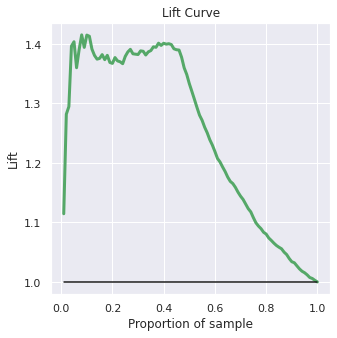

In [ ]:
plot_lift_curve(y_test, xg.predict(X_test_std),)

# Best Model

XG Boost model for Iteration 4 is the best model with following results. Using Oversampling and important variables which in XG Booster tree model

In [ ]:
#Evaluate the Model
xg_eval=evaluate_model(xg, X_test_std, y_test)

# Print result
print('Accuracy:', round(xg_eval['acc'],3))
print('Precision for terminated Policies:', round(xg_eval['prec'],2))
print('Recall for terminated Policies:', round(xg_eval['rec'],2))   #For 1
print('F1 Score:', round(xg_eval['f1'],2))
print('Cohens Kappa Score:', round(xg_eval['kappa'],2))
print('Area Under Curve:', round(xg_eval['auc'],2))
print('\nConfusion Matrix:\n', xg_eval['cm'])

# confusion matrix

# TP is bottom right
# TN is top left
# FP is top right
# FN is bottom left

Accuracy: 0.624
Precision for terminated Policies: 0.42
Recall for terminated Policies: 0.64
F1 Score: 0.51
Cohens Kappa Score: 0.22
Area Under Curve: 0.68

Confusion Matrix:
 [[5114 3167]
 [1290 2286]]


In [ ]:
#Confirmation for above function
print(classification_report(y_test, xg.predict(X_test_std)))

              precision    recall  f1-score   support

           0       0.80      0.62      0.70      8281
           1       0.42      0.64      0.51      3576

    accuracy                           0.62     11857
   macro avg       0.61      0.63      0.60     11857
weighted avg       0.68      0.62      0.64     11857



# Post Model Data Exploration

A new text file has been added for GIT Repo